# Import Libraries:-

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import ElasticNet,Lasso,LinearRegression,Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_1samp,chi2_contingency,binomtest,f_oneway

# Data Loading:-

In [5]:
ds=pd.read_csv("E:/NareshiTech/admission_predict.csv")
ds.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
ds=ds.rename(columns={'GRE Score':'GRE_Score','TOEFL Score':'TOEFL_Score','University Rating':'University_Rating','LOR ':'LOR','Chance of Admit ':'Chance_of_Admit'})

In [7]:
ds.shape

(500, 9)

- In this data set, We are having total 9 features including serial number and 500 rows.

In [8]:
ds.columns.to_list()

['Serial No.',
 'GRE_Score',
 'TOEFL_Score',
 'University_Rating',
 'SOP',
 'LOR',
 'CGPA',
 'Research',
 'Chance_of_Admit']

# Columns:-

- **Serial No.:** Its jest serial number only. So, we can igone this column.

- **GRE Score:** Graduate Record Examination, which means GRE, is an important step in the graduate school or business school application process.

- **TOEFL Score:** Test of English as a Foreign Language, which means TOEFL, is an important step in the test for communications language of the applicants.

- **University Rating:** Every University has a its own rating based on pass percentage of the students rating.

- **SOP:** Statement of Purpose, (SOP) is a document that students prepare to demonstrate why they are applying to a specific course at a specific university. SOP aims to comprehend a candidate's background, reasons for choosing a particular career route, and objectives.

- **LOR:** Letter of Recommendation or LOR is a document that provides the admission officers with a comprehensive insight into your suitable candidature, for admission into the concerned University.  It aims to provide a favourable picture of your academic performance, strengths, experiences, achievements, contributions, and skills.

- **CGPA:** Cumulative Grade Point Average, For schools and colleges, CGPA is used to measure the overall academic achievement of a student by awarding A, B, C, D or F grades. CGPA is a calculation of the average grade point obtained in all subjects except in additional subjects as per the study scheme.

- **Research:** The Research column is shown whether person has done the any kind of research or not.

- **Chance of Admit:** This Chance of Admit column is shown whether person will get the admission or not based on above parameters.

In [9]:
ds.count()

Serial No.           500
GRE_Score            500
TOEFL_Score          500
University_Rating    500
SOP                  500
LOR                  500
CGPA                 500
Research             500
Chance_of_Admit      500
dtype: int64

- columns are not having any null values. so, we can good to go.

In [10]:
ds.corr()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE_Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL_Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University_Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance_of_Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


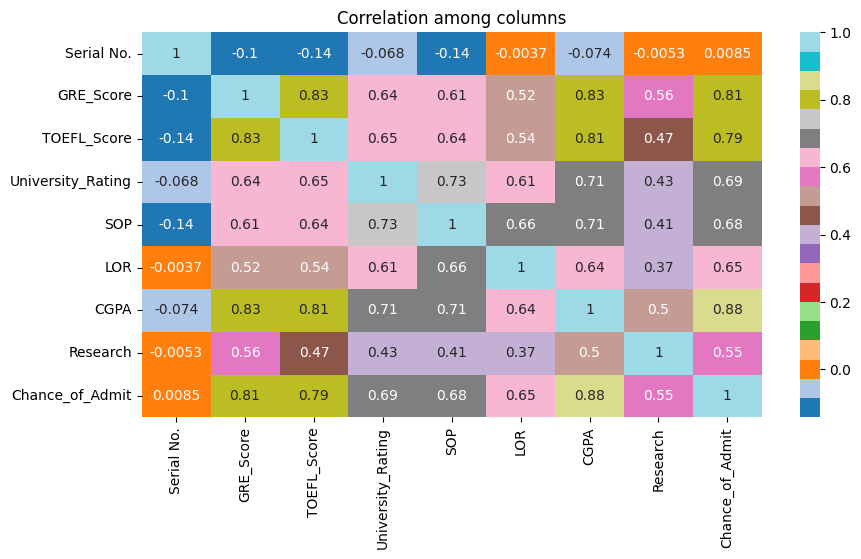

In [11]:
fig,ax=plt.subplots(figsize=(10,5))
sns.heatmap(data=ds.corr(),cmap='tab20',annot=True,ax=ax)
plt.title("Correlation among columns")
plt.show()

## Correlation between columns:-
### GRE_Score (Graduate Record Examination):-

In [12]:
ds[['GRE_Score','TOEFL_Score']].corr()

,GRE_Score,TOEFL_Score
GRE_Score,1.0000,0.8272
TOEFL_Score,0.8272,1.0000


- GRE & TOEFL scores are having **0.8272%** of correlation between them.

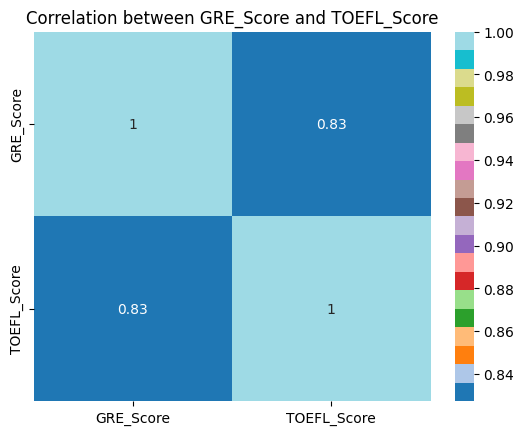

In [13]:
sns.heatmap(data=ds[['GRE_Score','TOEFL_Score']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between GRE_Score and TOEFL_Score")
plt.show()

In [14]:
ds[['GRE_Score','University_Rating']].corr()

,GRE_Score,University_Rating
GRE_Score,1.000000,0.635376
University_Rating,0.635376,1.000000


- GRE scores & University Rating are having **0.635376%** of correlation between them.

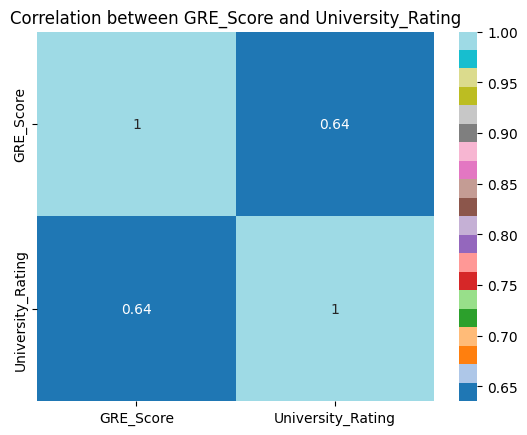

In [15]:
sns.heatmap(data=ds[['GRE_Score','University_Rating']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between GRE_Score and University_Rating")
plt.show()

In [16]:
ds[['GRE_Score','SOP']].corr()

,GRE_Score,SOP
GRE_Score,1.000000,0.613498
SOP,0.613498,1.000000


- GRE scores & SOP are having **0.613498%** of correlation between them.

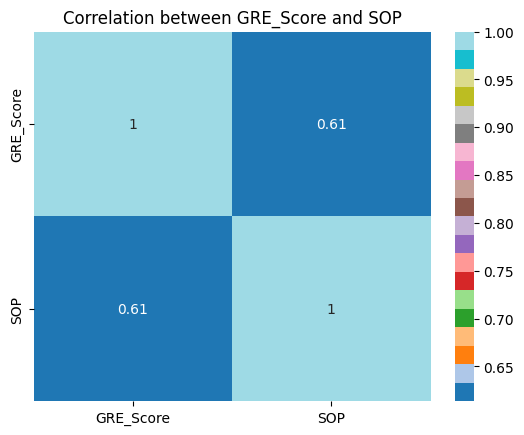

In [17]:
sns.heatmap(data=ds[['GRE_Score','SOP']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between GRE_Score and SOP")
plt.show()

In [18]:
ds[['GRE_Score','LOR']].corr()

,GRE_Score,LOR
GRE_Score,1.000000,0.524679
LOR,0.524679,1.000000


- GRE scores & LOR are having **0.524679%** of correlation between them.

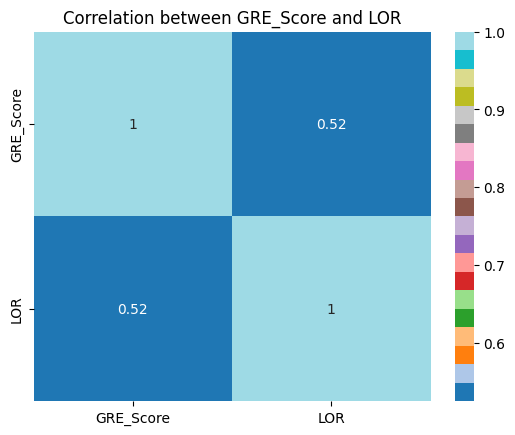

In [19]:
sns.heatmap(data=ds[['GRE_Score','LOR']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between GRE_Score and LOR")
plt.show()

In [20]:
ds[['GRE_Score','CGPA']].corr()

,GRE_Score,CGPA
GRE_Score,1.000000,0.825878
CGPA,0.825878,1.000000


- GRE scores & CGPA are having **0.825878%** of correlation between them.

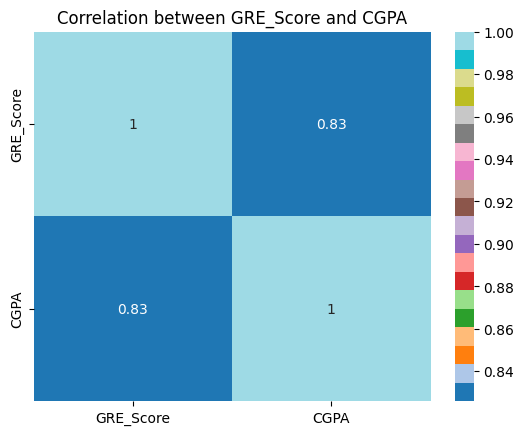

In [21]:
sns.heatmap(data=ds[['GRE_Score','CGPA']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between GRE_Score and CGPA")
plt.show()

In [22]:
ds[['GRE_Score','Research']].corr()

,GRE_Score,Research
GRE_Score,1.000000,0.563398
Research,0.563398,1.000000


- GRE scores & CGPA are having **0.563398%** of correlation between them.

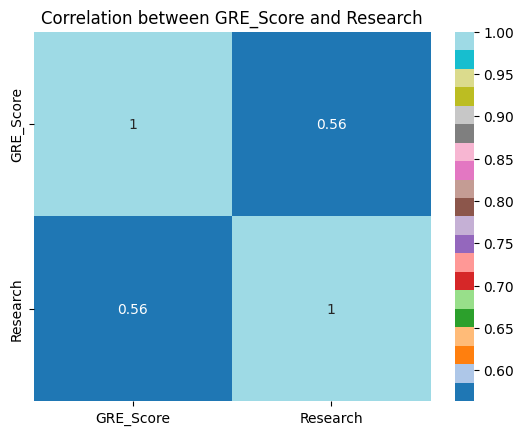

In [23]:
sns.heatmap(data=ds[['GRE_Score','Research']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between GRE_Score and Research")
plt.show()

In [24]:
ds[['GRE_Score','Chance_of_Admit']].corr()

,GRE_Score,Chance_of_Admit
GRE_Score,1.000000,0.810351
Chance_of_Admit,0.810351,1.000000


- GRE scores & Chance_of_Admit are having **0.810351%** of correlation between them.

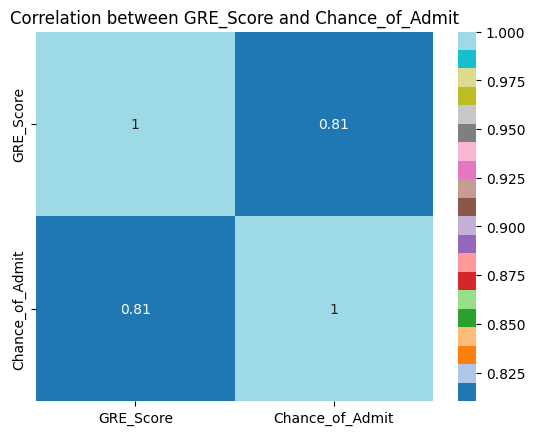

In [25]:
sns.heatmap(data=ds[['GRE_Score','Chance_of_Admit']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between GRE_Score and Chance_of_Admit")
plt.show()

- (GRE score & TOEFL score), (GRE score & CGPA score) and (GRE scores & Chance_of_Admit) are having high correlation with respect **0.827% and 0.825% and 0.810351%**.

- GRE scores & LOR are having less correlation with respect **0.524679%**.

### TOEFL_Score (Test of English as a Foreign Language):-

In [26]:
ds.head()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [27]:
ds[['TOEFL_Score','University_Rating']].corr()

,TOEFL_Score,University_Rating
TOEFL_Score,1.000000,0.649799
University_Rating,0.649799,1.000000


- TOEFL_Score & University_Rating columns are having **0.649799%** of correlation between them.

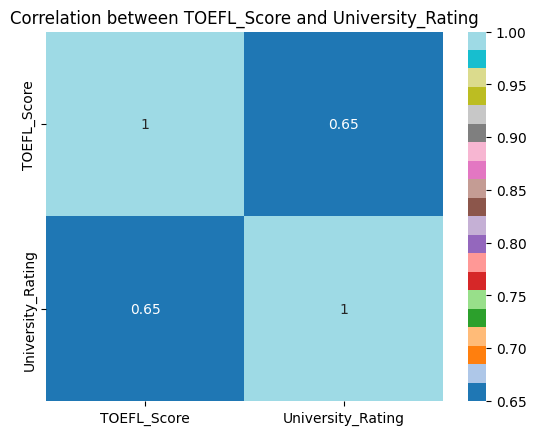

In [28]:
sns.heatmap(data=ds[['TOEFL_Score','University_Rating']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between TOEFL_Score and University_Rating")
plt.show()

In [29]:
ds[['TOEFL_Score','SOP']].corr()

,TOEFL_Score,SOP
TOEFL_Score,1.00000,0.64441
SOP,0.64441,1.00000


- TOEFL_Score & SOP columns are having **0.64441%** of correlation between them.

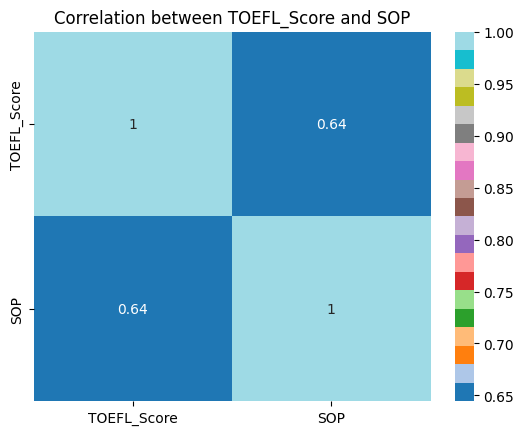

In [30]:
sns.heatmap(data=ds[['TOEFL_Score','SOP']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between TOEFL_Score and SOP")
plt.show()

In [31]:
ds[['TOEFL_Score','LOR']].corr()

,TOEFL_Score,LOR
TOEFL_Score,1.000000,0.541563
LOR,0.541563,1.000000


- TOEFL_Score & LOR columns are having **0.541563%** of correlation between them.

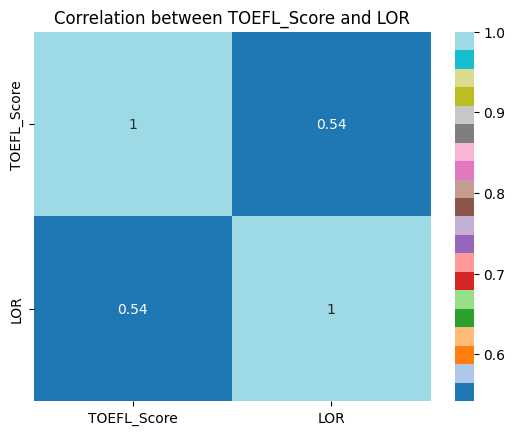

In [32]:
sns.heatmap(data=ds[['TOEFL_Score','LOR']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between TOEFL_Score and LOR")
plt.show()

In [33]:
ds[['TOEFL_Score','CGPA']].corr()

,TOEFL_Score,CGPA
TOEFL_Score,1.000000,0.810574
CGPA,0.810574,1.000000


- TOEFL_Score & CGPA columns are having **0.810574%** of correlation between them.

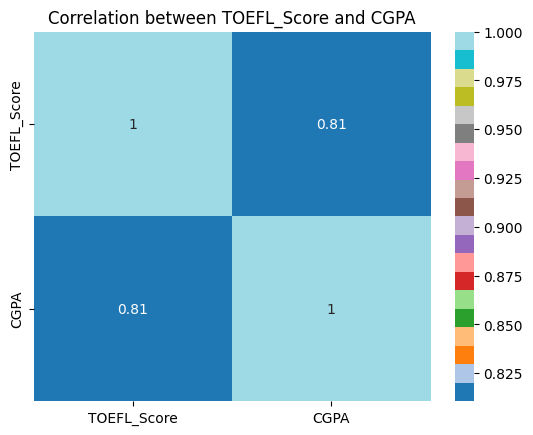

In [34]:
sns.heatmap(data=ds[['TOEFL_Score','CGPA']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between TOEFL_Score and CGPA")
plt.show()

In [35]:
ds[['TOEFL_Score','Research']].corr()

,TOEFL_Score,Research
TOEFL_Score,1.000000,0.467012
Research,0.467012,1.000000


- TOEFL_Score & Research columns are having **0.467012%** of correlation between them.

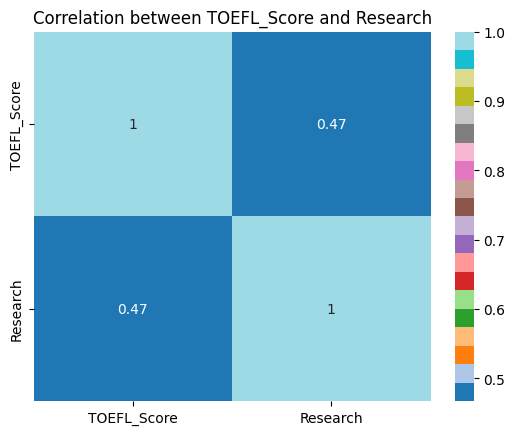

In [36]:
sns.heatmap(data=ds[['TOEFL_Score','Research']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between TOEFL_Score and Research")
plt.show()

In [37]:
ds[['TOEFL_Score','Chance_of_Admit']].corr()

,TOEFL_Score,Chance_of_Admit
TOEFL_Score,1.000000,0.792228
Chance_of_Admit,0.792228,1.000000


- TOEFL_Score & Chance_of_Admit columns are having **0.792228%** of correlation between them.

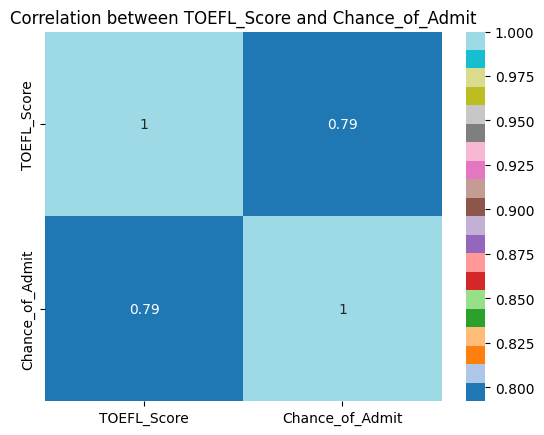

In [38]:
sns.heatmap(data=ds[['TOEFL_Score','Chance_of_Admit']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between TOEFL_Score and Chance_of_Admit")
plt.show()

- (TOEFL_Score & CGPA) and (TOEFL_Score & Chance_of_Admit) are having high correlation with respect to the **0.810574% and 0.792228%**.

- TOEFL_Score & Research are having less correlation with respect to the **0.467012%**.

### University_Rating:-

In [39]:
ds[['University_Rating','SOP']].corr()

,University_Rating,SOP
University_Rating,1.000000,0.728024
SOP,0.728024,1.000000


- University_Rating & SOP columns are having **0.728024%** of correlation between them.

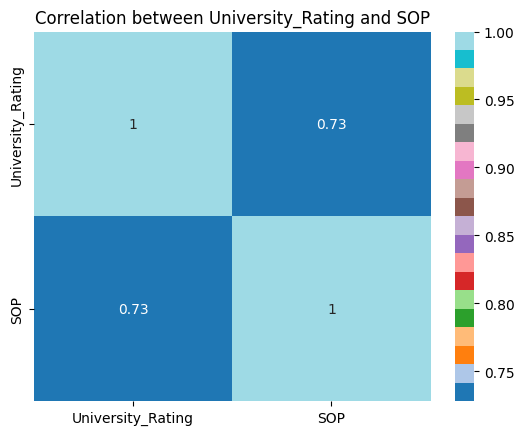

In [40]:
sns.heatmap(data=ds[['University_Rating','SOP']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between University_Rating and SOP")
plt.show()

In [41]:
ds[['University_Rating','LOR']].corr()

,University_Rating,LOR
University_Rating,1.000000,0.608651
LOR,0.608651,1.000000


- University_Rating & LOR columns are having **0.608651%** of correlation between them.

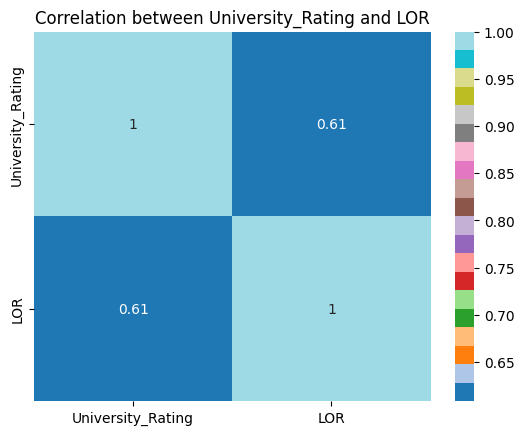

In [42]:
sns.heatmap(data=ds[['University_Rating','LOR']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between University_Rating and LOR")
plt.show()

In [43]:
ds[['University_Rating','CGPA']].corr()

,University_Rating,CGPA
University_Rating,1.000000,0.705254
CGPA,0.705254,1.000000


- University_Rating & CGPA columns are having **0.705254%** of correlation between them.

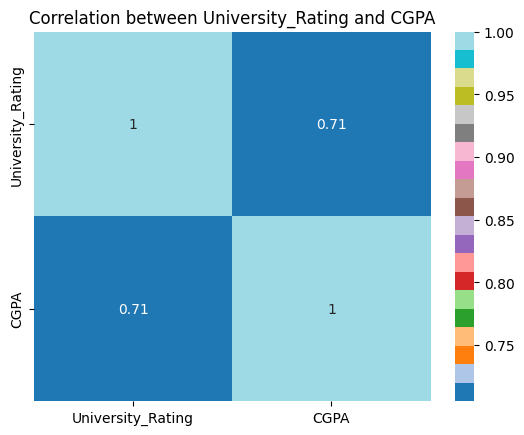

In [44]:
sns.heatmap(data=ds[['University_Rating','CGPA']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between University_Rating and CGPA")
plt.show()

In [45]:
ds[['University_Rating','Research']].corr()

,University_Rating,Research
University_Rating,1.000000,0.427047
Research,0.427047,1.000000


- University_Rating & Research columns are having **0.427047%** of correlation between them.

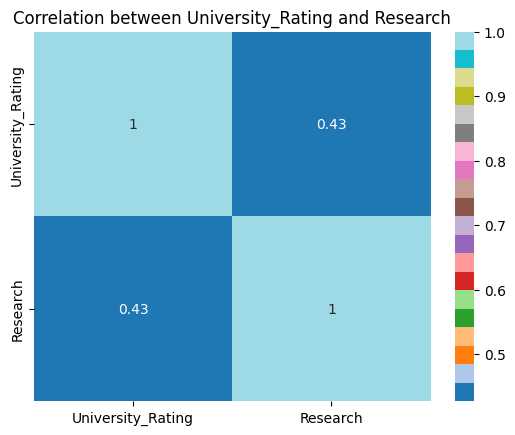

In [46]:
sns.heatmap(data=ds[['University_Rating','Research']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between University_Rating and Research")
plt.show()

In [47]:
ds[['University_Rating','Chance_of_Admit']].corr()

,University_Rating,Chance_of_Admit
University_Rating,1.000000,0.690132
Chance_of_Admit,0.690132,1.000000


- University_Rating & Chance_of_Admit columns are having **0.690132%** of correlation between them.

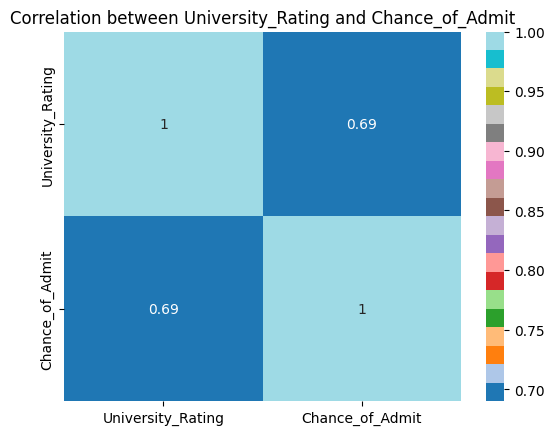

In [48]:
sns.heatmap(data=ds[['University_Rating','Chance_of_Admit']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between University_Rating and Chance_of_Admit")
plt.show()

- (University_Rating & SOP) and (University_Rating & CGPA) are having high correlation with respect to the **0.728024% and 0.705254%**.

- University_Rating & Research are having less correlation with respect to the **0.427047%**.

### SOP (Statement of Purpose):-

In [49]:
ds[['SOP','LOR']].corr()

,SOP,LOR
SOP,1.000000,0.663707
LOR,0.663707,1.000000


- SOP & LOR columns are having **0.663707%** of correlation between them.

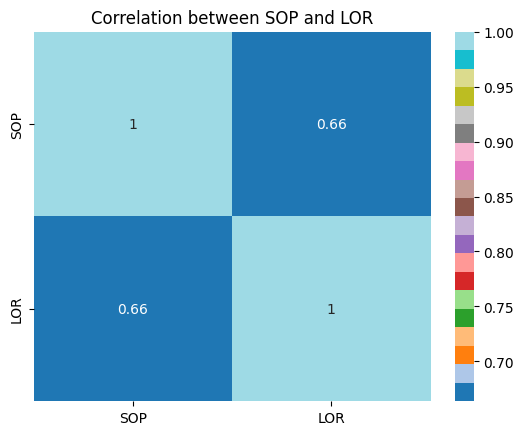

In [50]:
sns.heatmap(data=ds[['SOP','LOR']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between SOP and LOR")
plt.show()

In [51]:
ds[['SOP','CGPA']].corr()

,SOP,CGPA
SOP,1.000000,0.712154
CGPA,0.712154,1.000000


- SOP & CGPA columns are having **0.712154%** of correlation between them.

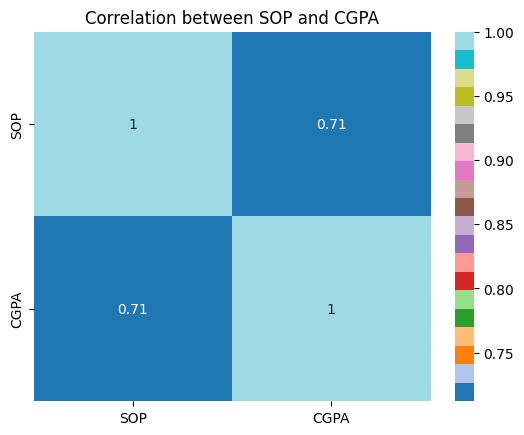

In [52]:
sns.heatmap(data=ds[['SOP','CGPA']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between SOP and CGPA")
plt.show()

In [53]:
ds[['SOP','Research']].corr()

,SOP,Research
SOP,1.000000,0.408116
Research,0.408116,1.000000


- SOP & Research columns are having **0.408116%** of correlation between them.

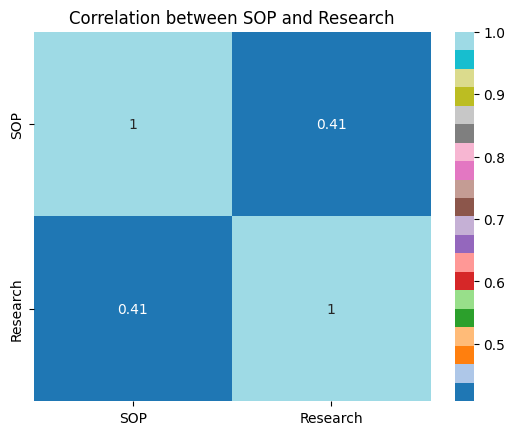

In [54]:
sns.heatmap(data=ds[['SOP','Research']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between SOP and Research")
plt.show()

In [55]:
ds[['SOP','Chance_of_Admit']].corr()

,SOP,Chance_of_Admit
SOP,1.000000,0.684137
Chance_of_Admit,0.684137,1.000000


- SOP & Chance_of_Admit columns are having **0.684137%** of correlation between them.

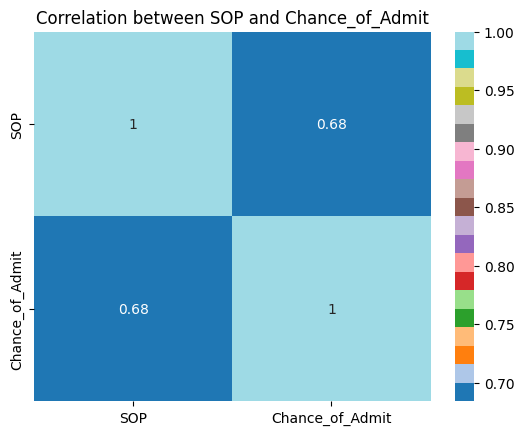

In [56]:
sns.heatmap(data=ds[['SOP','Chance_of_Admit']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between SOP and Chance_of_Admit")
plt.show()

- SOP & CGPA are having high correlation with respect to the **0.712154%**.
- SOP & Research are having less correlation with respect to the **0.408116%**.

### LOR (Letter of Recommendation):-

In [57]:
ds[['LOR','CGPA']].corr()

,LOR,CGPA
LOR,1.000000,0.637469
CGPA,0.637469,1.000000


- LOR & CGPA columns are having **0.637469%** of correlation between them.

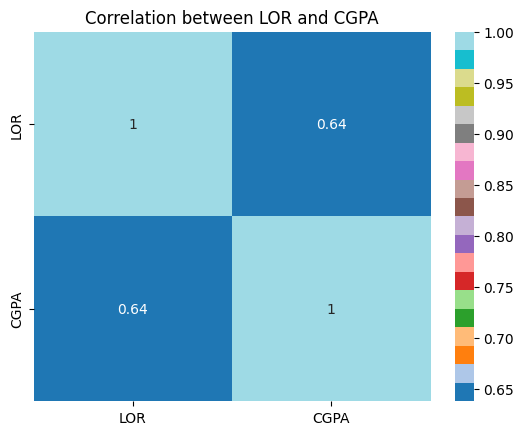

In [58]:
sns.heatmap(data=ds[['LOR','CGPA']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between LOR and CGPA")
plt.show()

In [59]:
ds[['LOR','Research']].corr()

,LOR,Research
LOR,1.000000,0.372526
Research,0.372526,1.000000


- LOR & Research columns are having **0.372526%** of correlation between them.

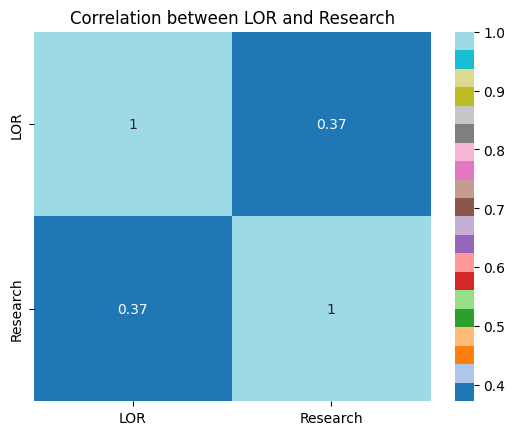

In [60]:
sns.heatmap(data=ds[['LOR','Research']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between LOR and Research")
plt.show()

In [61]:
ds[['LOR','Chance_of_Admit']].corr()

,LOR,Chance_of_Admit
LOR,1.000000,0.645365
Chance_of_Admit,0.645365,1.000000


- LOR & Chance_of_Admit columns are having **0.645365%** of correlation between them.

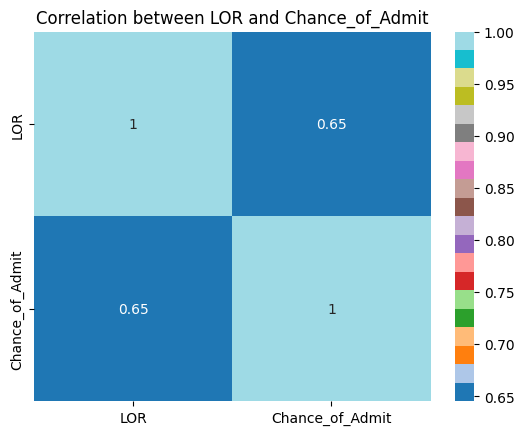

In [62]:
sns.heatmap(data=ds[['LOR','Chance_of_Admit']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between LOR and Chance_of_Admit")
plt.show()

### CGPA (Cumulative Grade Point Average):-

In [63]:
ds[['CGPA','Research']].corr()

,CGPA,Research
CGPA,1.000000,0.501311
Research,0.501311,1.000000


- CGPA & Research columns are having **0.501311%** of correlation between them.

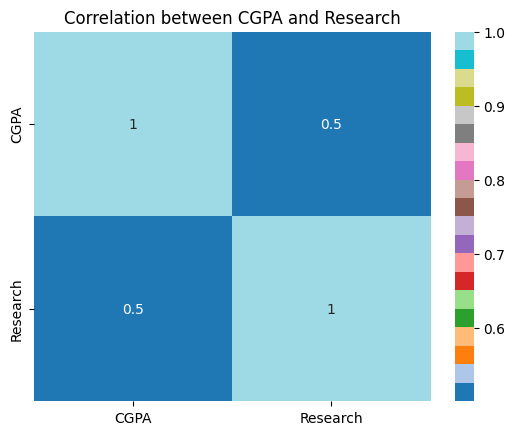

In [64]:
sns.heatmap(data=ds[['CGPA','Research']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between CGPA and Research")
plt.show()

In [65]:
ds[['CGPA','Chance_of_Admit']].corr()

,CGPA,Chance_of_Admit
CGPA,1.000000,0.882413
Chance_of_Admit,0.882413,1.000000


- CGPA & Chance_of_Admit columns are having **0.882413%** of correlation between them.

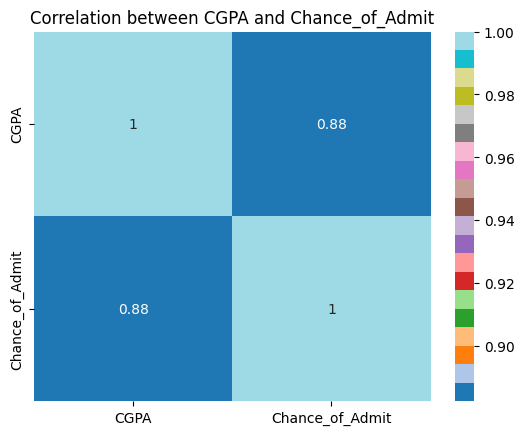

In [66]:
sns.heatmap(data=ds[['CGPA','Chance_of_Admit']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between CGPA and Chance_of_Admit")
plt.show()

- CGPA & Chance_of_Admit are having high correlation with respect to the **0.882413%**.
- CGPA & Research are having less correlation with respect to the **0.501311%**.

### Research:-

In [67]:
ds[['Research','Chance_of_Admit']].corr()

,Research,Chance_of_Admit
Research,1.000000,0.545871
Chance_of_Admit,0.545871,1.000000


- Research & Chance_of_Admit columns are having **0.545871%** of correlation between them.

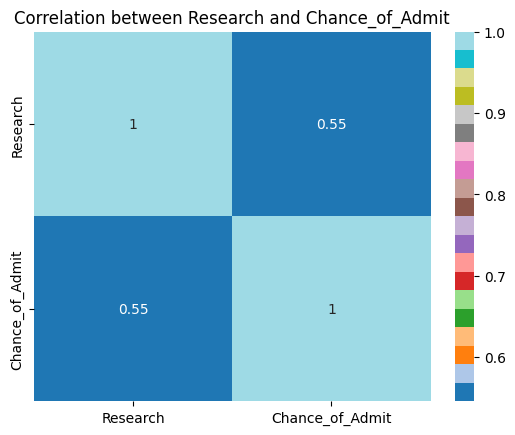

In [68]:
sns.heatmap(data=ds[['Research','Chance_of_Admit']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between Research and Chance_of_Admit")
plt.show()

## EDA:-

In [69]:
ds.describe()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


- All columns are having simular values for mean & 50% percentile of the except Research column. might there is a chance of having skewed data in Reseach column.

In [70]:
ds.dtypes

Serial No.             int64
GRE_Score              int64
TOEFL_Score            int64
University_Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance_of_Admit      float64
dtype: object

- **GRE_Score,TOEFL_Score,University_Rating,Research** This are columns are having with discrete count values.
- **SOP,LOR,CGPA,Chance_of_Admit** This are columns are having with discrete continuous values.

In [71]:
ds.duplicated().sum()

0

- There is no any duplicated values are presents in this data set.

In [72]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE_Score          500 non-null    int64  
 2   TOEFL_Score        500 non-null    int64  
 3   University_Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance_of_Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


- In ths data set, we have total 500 row and 9 columns. But we are not going to include serial number column. so, after ignoring serial number column we get 8 columns in this data set.

In [73]:
ds.isnull().sum()

Serial No.           0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

- Non of the column having null values.

In [74]:
ds.std()

Serial No.           144.481833
GRE_Score             11.295148
TOEFL_Score            6.081868
University_Rating      1.143512
SOP                    0.991004
LOR                    0.925450
CGPA                   0.604813
Research               0.496884
Chance_of_Admit        0.141140
dtype: float64

- **Standard deviation is a number that describes how spread out the values are.**
- **A low standard deviation means that most of the numbers are close to the mean (average) value.**
- **A high standard deviation means that the values are spread out over a wider range.**

- GRE_Score column std values are within the range of 11.295148 from the mean, which mean - 316.472000.	
- TOEFL_Score column std values are within the range of 6.081868 from the mean, which mean - 107.192000.
- University_Rating column std values are within the range of 1.143512 from the mean, which mean - 3.114000.
- SOP column std values are within the range of 0.991004 from the mean, which mean - 3.374000.
- LOR column std values are within the range of 0.925450 from the mean, which mean - 3.48400.
- CGPA column std values are within the range of 0.604813 from the mean, which mean - 8.576440.
- Research column std values are within the range of 0.496884 from the mean, which mean - 0.560000.
- Chance_of_Admit column std values are within the range of 0.141140 from the mean, which mean - 0.72174.

In [75]:
ds.skew()

Serial No.           0.000000
GRE_Score           -0.039842
TOEFL_Score          0.095601
University_Rating    0.090295
SOP                 -0.228972
LOR                 -0.145290
CGPA                -0.026613
Research            -0.242475
Chance_of_Admit     -0.289966
dtype: float64

- Skewness seems, for every column elements are symmetrically distributed. 

- The Density plot for GRE_Score seems to be symmetric distribution.

C:\Users\manoj\AppData\Local\Temp\ipykernel_10276\2616013650.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['GRE_Score'],ax=ax)


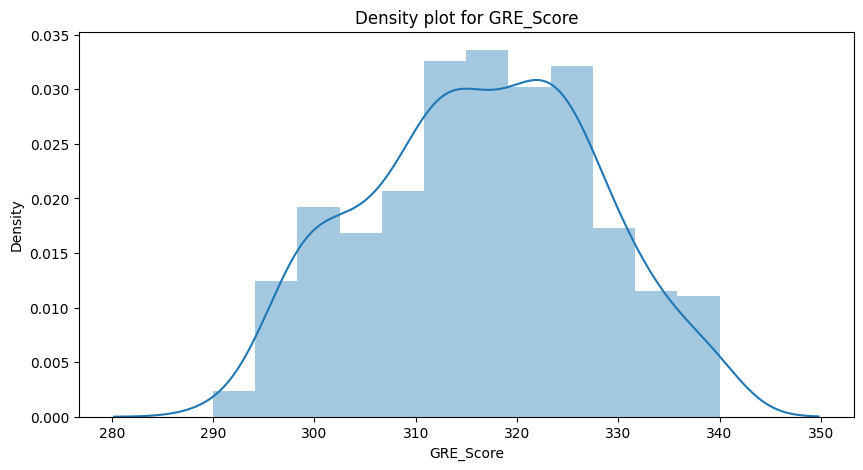

In [76]:
fir,ax=plt.subplots(figsize=(10,5))
sns.distplot(ds['GRE_Score'],ax=ax)
plt.title("Density plot for GRE_Score")
plt.show()

C:\Users\manoj\AppData\Local\Temp\ipykernel_10276\3656918755.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['TOEFL_Score'],ax=ax)


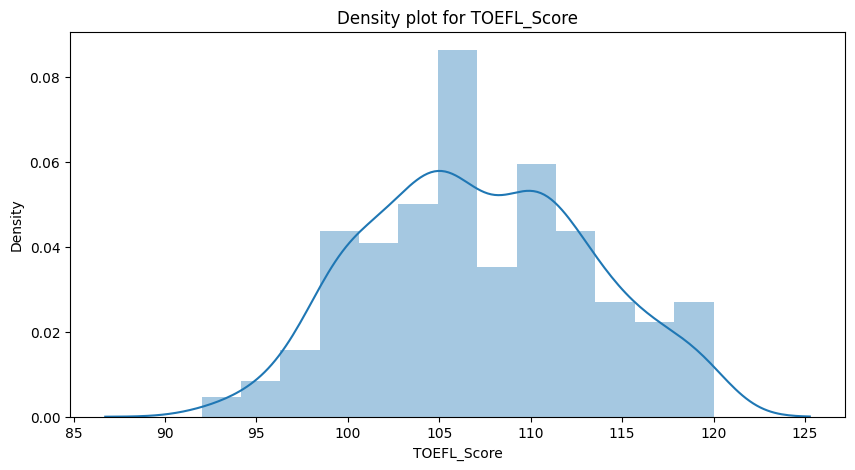

In [77]:
fir,ax=plt.subplots(figsize=(10,5))
sns.distplot(ds['TOEFL_Score'],ax=ax)
plt.title("Density plot for TOEFL_Score")
plt.show()

- The Density plot for TOEFL_Score seems to be symmetric distribution.

C:\Users\manoj\AppData\Local\Temp\ipykernel_10276\4197453344.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['University_Rating'],ax=ax)


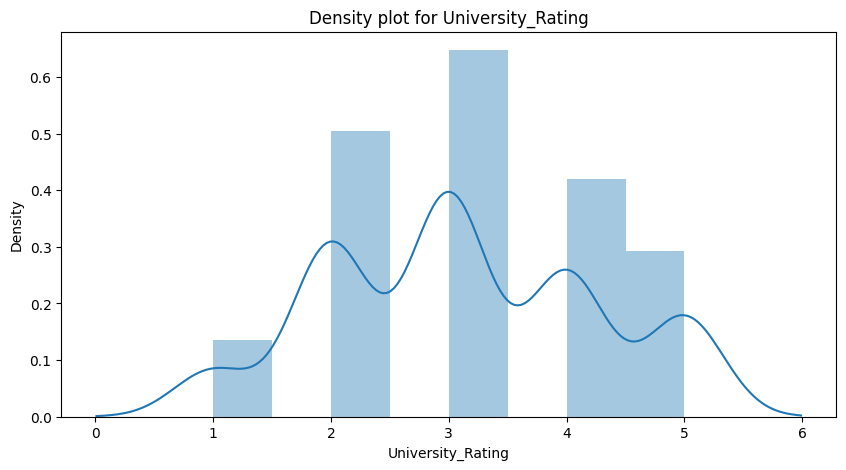

In [78]:
fir,ax=plt.subplots(figsize=(10,5))
sns.distplot(ds['University_Rating'],ax=ax)
plt.title("Density plot for University_Rating")
plt.show()

- The Density plot for University_Rating seems to be symmetric distribution.

C:\Users\manoj\AppData\Local\Temp\ipykernel_10276\911174834.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['SOP'],ax=ax)


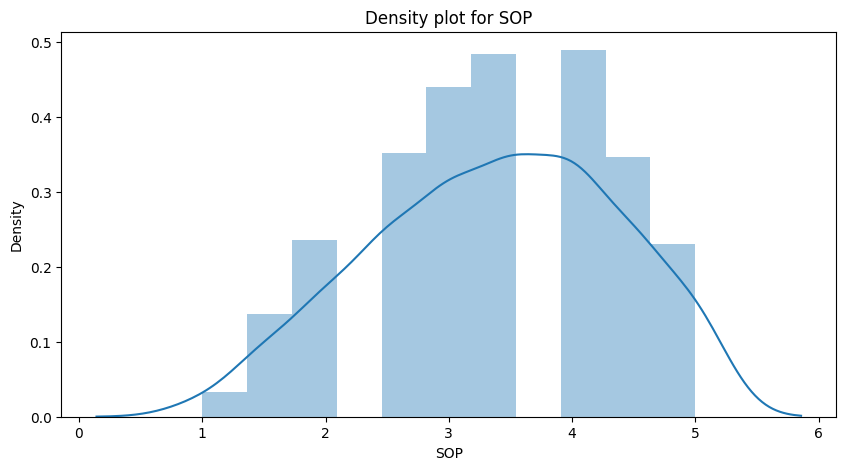

In [79]:
fir,ax=plt.subplots(figsize=(10,5))
sns.distplot(ds['SOP'],ax=ax)
plt.title("Density plot for SOP")
plt.show()

- The Density plot for SOP seems to be symmetric distribution.

C:\Users\manoj\AppData\Local\Temp\ipykernel_10276\1859254203.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['LOR'],ax=ax)


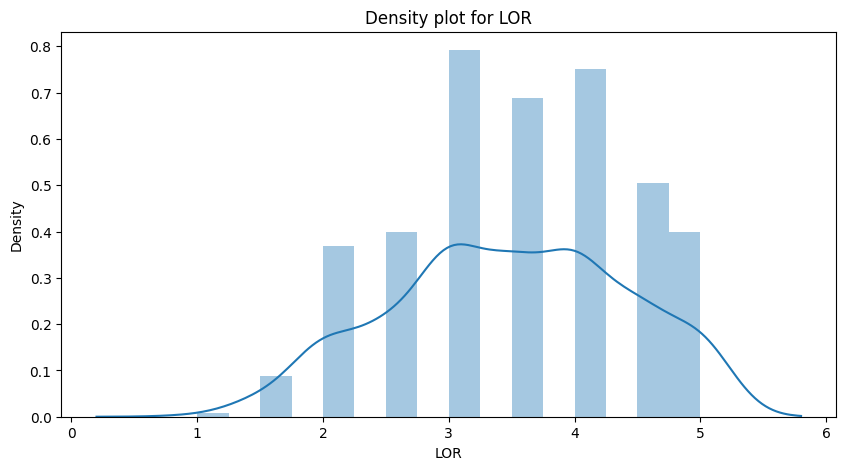

In [80]:
fir,ax=plt.subplots(figsize=(10,5))
sns.distplot(ds['LOR'],ax=ax)
plt.title("Density plot for LOR")
plt.show()

- The Density plot for LOR seems to be symmetric distribution.

C:\Users\manoj\AppData\Local\Temp\ipykernel_10276\3598180471.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['CGPA'],ax=ax)


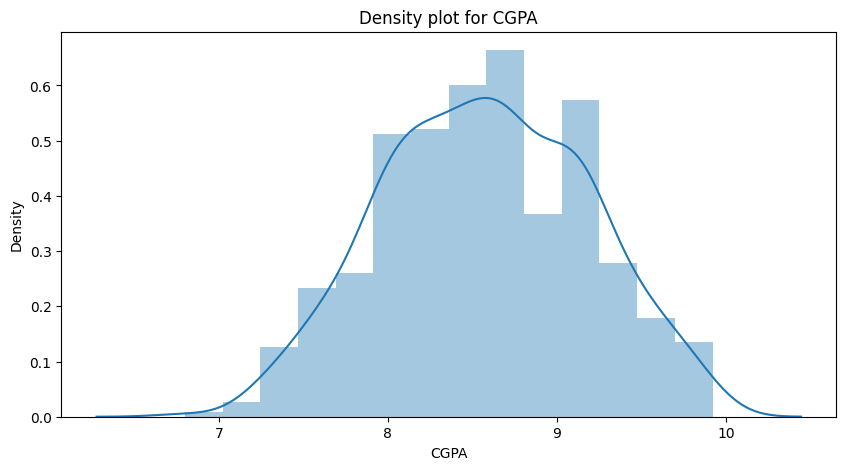

In [81]:
fir,ax=plt.subplots(figsize=(10,5))
sns.distplot(ds['CGPA'],ax=ax)
plt.title("Density plot for CGPA")
plt.show()

- The Density plot for CGPA seems to be symmetric distribution.

C:\Users\manoj\AppData\Local\Temp\ipykernel_10276\2841822842.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['Research'],ax=ax)


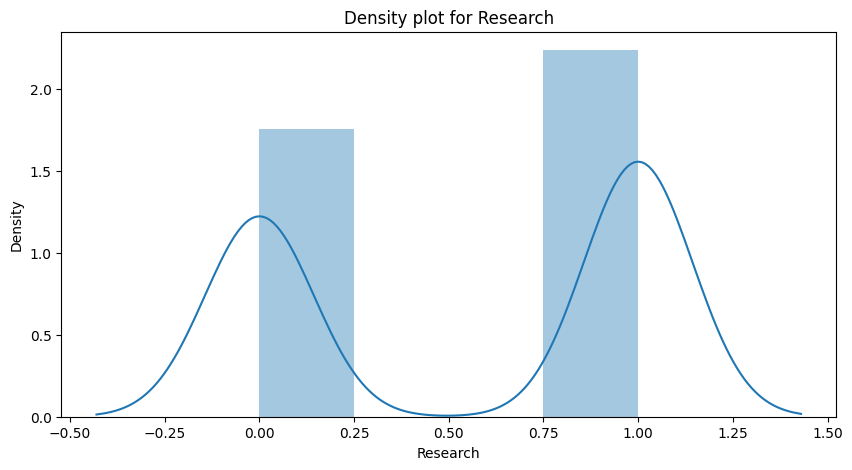

In [82]:
fir,ax=plt.subplots(figsize=(10,5))
sns.distplot(ds['Research'],ax=ax)
plt.title("Density plot for Research")
plt.show()

- The Density plot for Research seems to be symmetric distribution.

C:\Users\manoj\AppData\Local\Temp\ipykernel_10276\2584046887.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['Chance_of_Admit'],ax=ax)


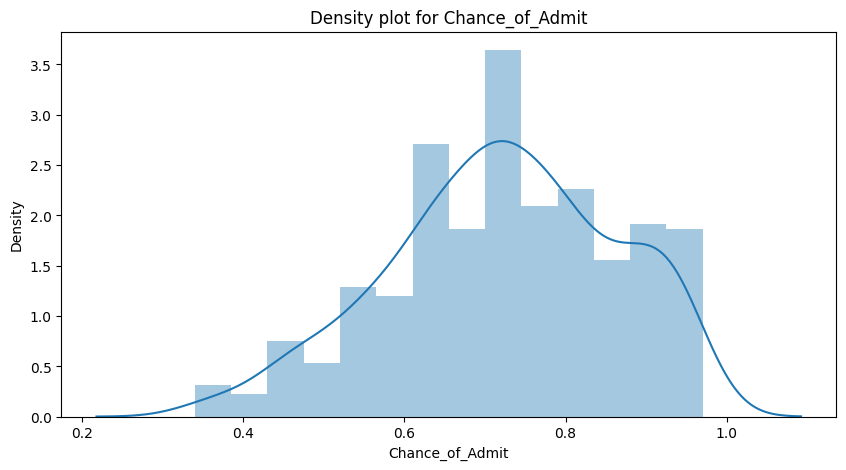

In [83]:
fir,ax=plt.subplots(figsize=(10,5))
sns.distplot(ds['Chance_of_Admit'],ax=ax)
plt.title("Density plot for Chance_of_Admit")
plt.show()

- The Density plot for Chance_of_Admit seems to be small skewed distribution.

## Box Plotting:-

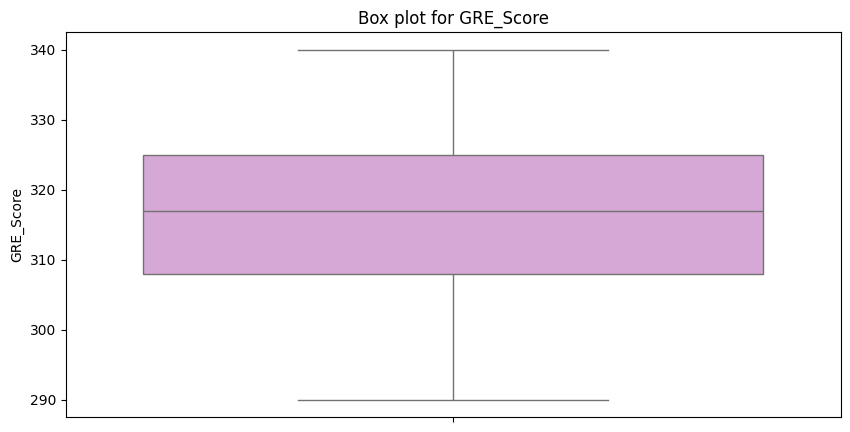

In [84]:
fir,ax=plt.subplots(figsize=(10,5))
sns.boxplot(data=ds['GRE_Score'],ax=ax,color='plum') # type: ignore
plt.title("Box plot for GRE_Score")
plt.show()

- There is no any outliers in the GRE_Score column.

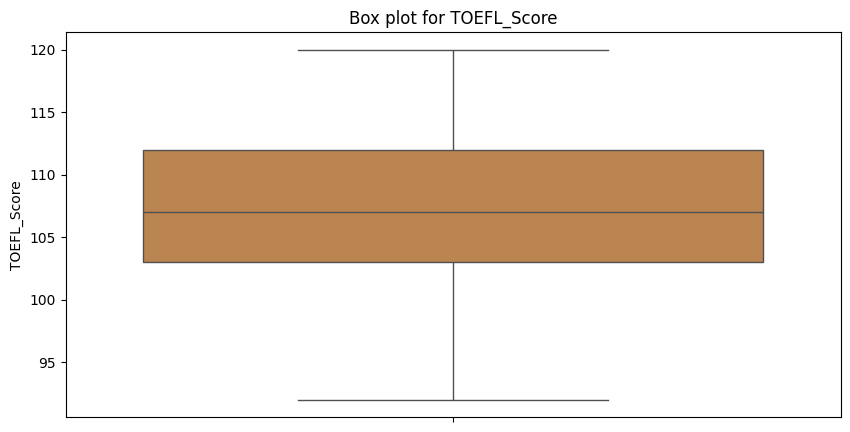

In [85]:
fir,ax=plt.subplots(figsize=(10,5))
sns.boxplot(data=ds['TOEFL_Score'],ax=ax,color='peru') # type: ignore
plt.title("Box plot for TOEFL_Score")
plt.show()

- There is no any outliers in the TOEFL_Score column.

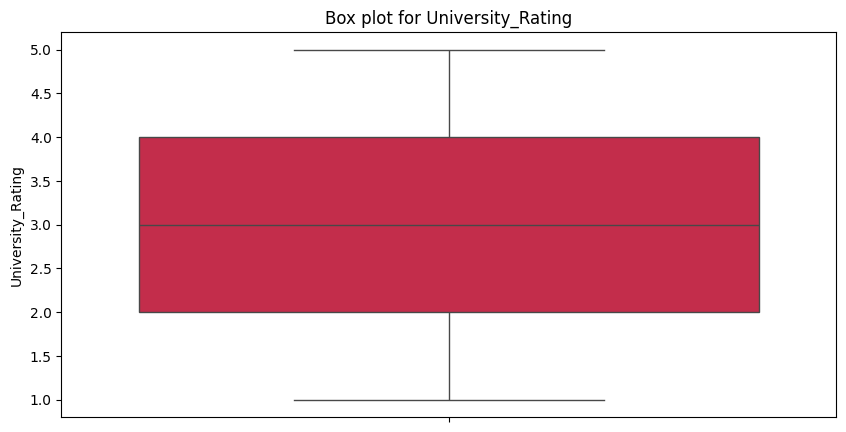

In [86]:
fir,ax=plt.subplots(figsize=(10,5))
sns.boxplot(data=ds['University_Rating'],ax=ax,color='crimson') # type: ignore
plt.title("Box plot for University_Rating")
plt.show()

- There is no any outliers in the University_Rating column.

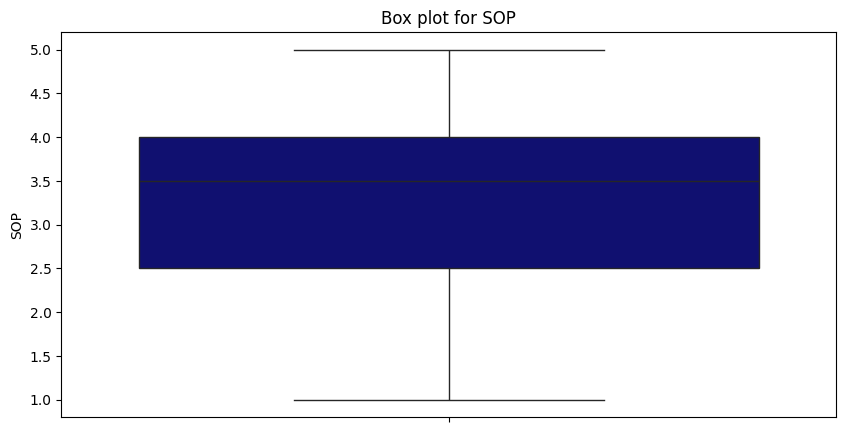

In [87]:
fir,ax=plt.subplots(figsize=(10,5))
sns.boxplot(data=ds['SOP'],ax=ax,color='navy') # type: ignore
plt.title("Box plot for SOP")
plt.show()

- There is no any outliers in the SOP column.

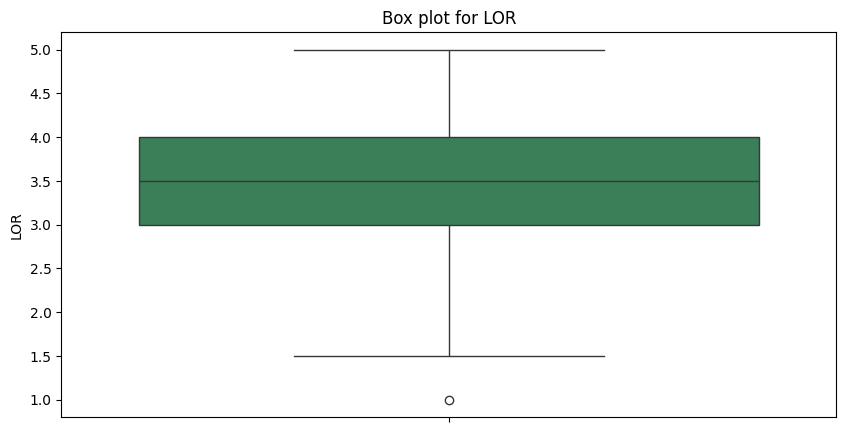

In [88]:
fir,ax=plt.subplots(figsize=(10,5))
sns.boxplot(data=ds['LOR'],ax=ax,color='seagreen') # type: ignore
plt.title("Box plot for LOR")
plt.show()

- There is one outliers in the LOR column and it presents in the lower boundry.

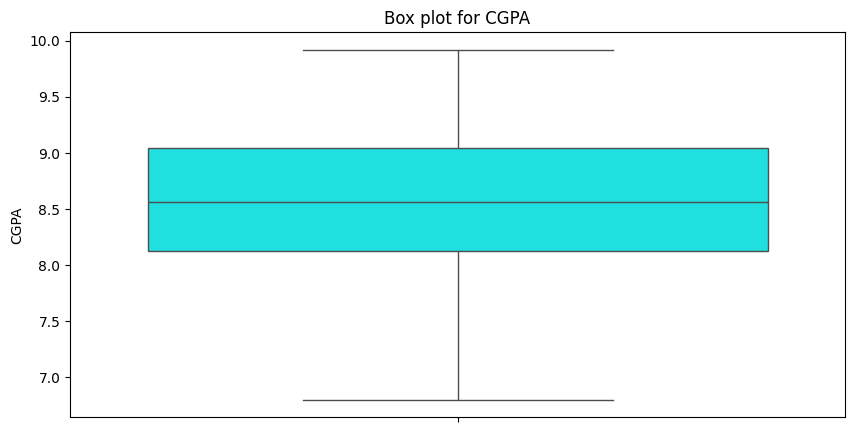

In [89]:
fir,ax=plt.subplots(figsize=(10,5))
sns.boxplot(data=ds['CGPA'],ax=ax,color='cyan') # type: ignore
plt.title("Box plot for CGPA")
plt.show()

- There is no any outliers in the CGPA column.

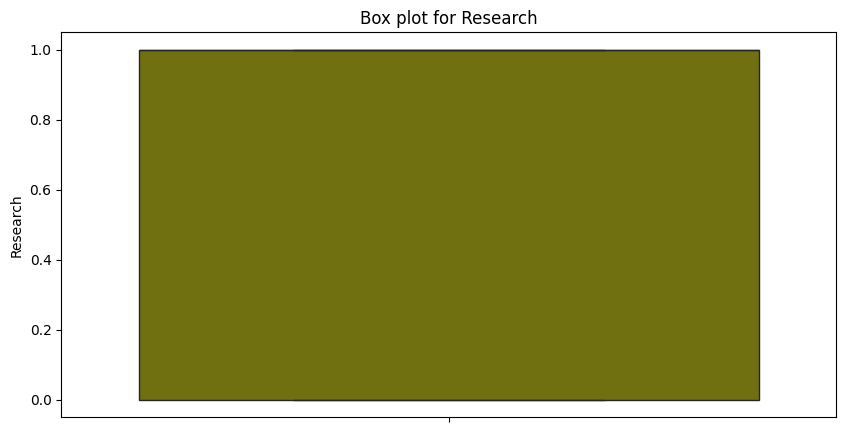

In [90]:
fir,ax=plt.subplots(figsize=(10,5))
sns.boxplot(data=ds['Research'],ax=ax,color='olive') # type: ignore
plt.title("Box plot for Research")
plt.show()

- There is no any outliers in the Research column.

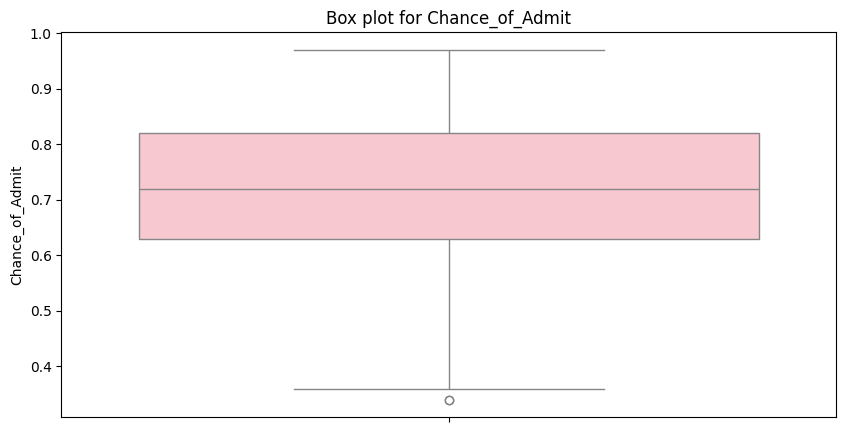

In [91]:
fir,ax=plt.subplots(figsize=(10,5))
sns.boxplot(data=ds['Chance_of_Admit'],ax=ax,color='pink') # type: ignore
plt.title("Box plot for Chance_of_Admit")
plt.show()

- There is one outliers in the Chance_of_Admit column and it presents in the lower boundry.

## Scatter Plotting:-

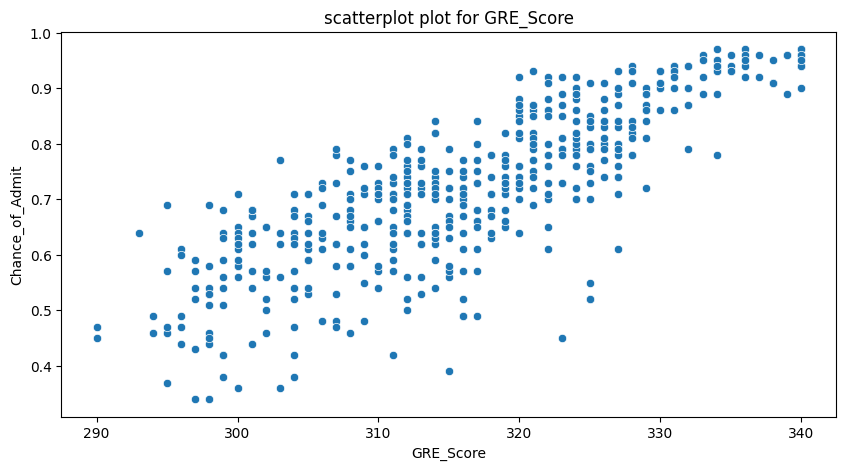

In [92]:
fir,ax=plt.subplots(figsize=(10,5))
sns.scatterplot(data=ds,x='GRE_Score',y='Chance_of_Admit')
plt.title("scatterplot plot for GRE_Score")
plt.show()

- Relationship between GRE_Score & Chance_of_Admit having passitive correlation.

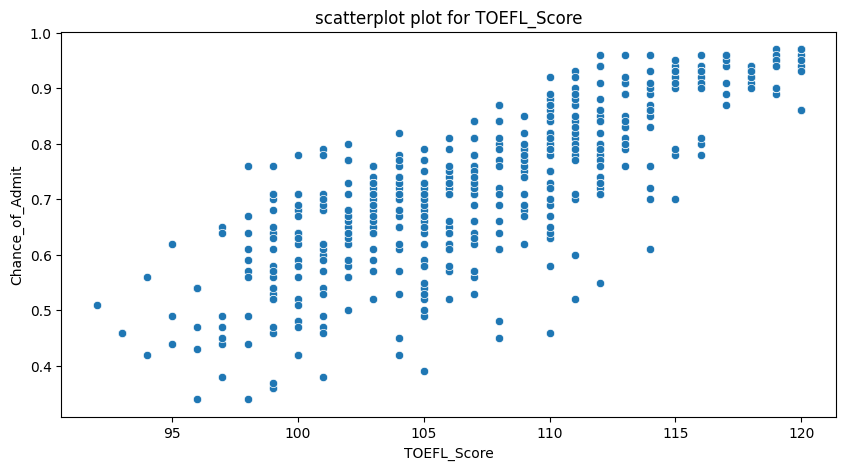

In [93]:
fir,ax=plt.subplots(figsize=(10,5))
sns.scatterplot(data=ds,x='TOEFL_Score',y='Chance_of_Admit')
plt.title("scatterplot plot for TOEFL_Score")
plt.show()

- Relationship between TOEFL_Score & Chance_of_Admit having passitive correlation.

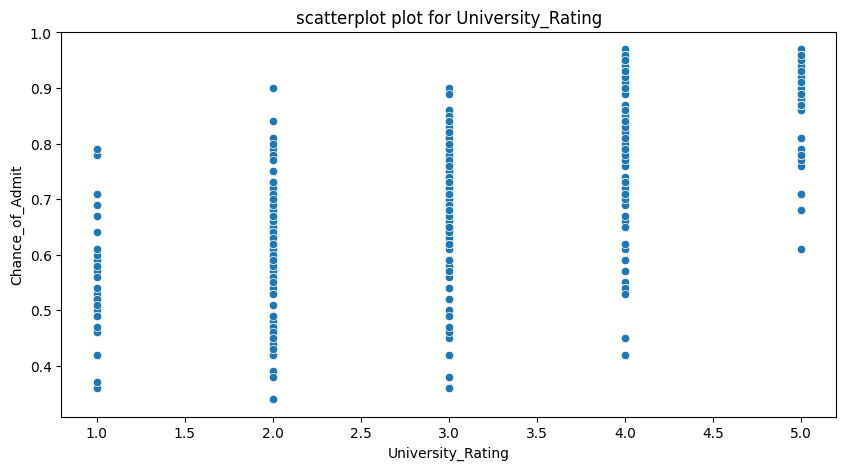

In [94]:
fir,ax=plt.subplots(figsize=(10,5))
sns.scatterplot(data=ds,x='University_Rating',y='Chance_of_Admit')
plt.title("scatterplot plot for University_Rating")
plt.show()

- There is no relationship between University_Rating & Chance_of_Admit.

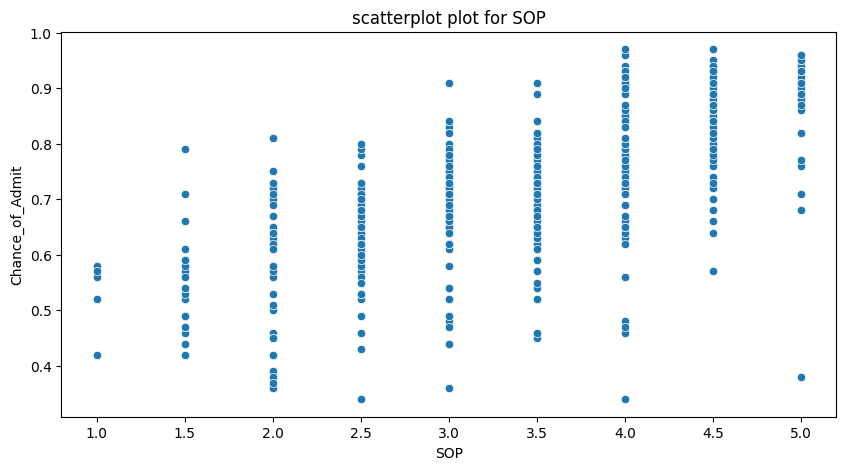

In [95]:
fir,ax=plt.subplots(figsize=(10,5))
sns.scatterplot(data=ds,x='SOP',y='Chance_of_Admit')
plt.title("scatterplot plot for SOP")
plt.show()

- There is no relationship between SOP & Chance_of_Admit.

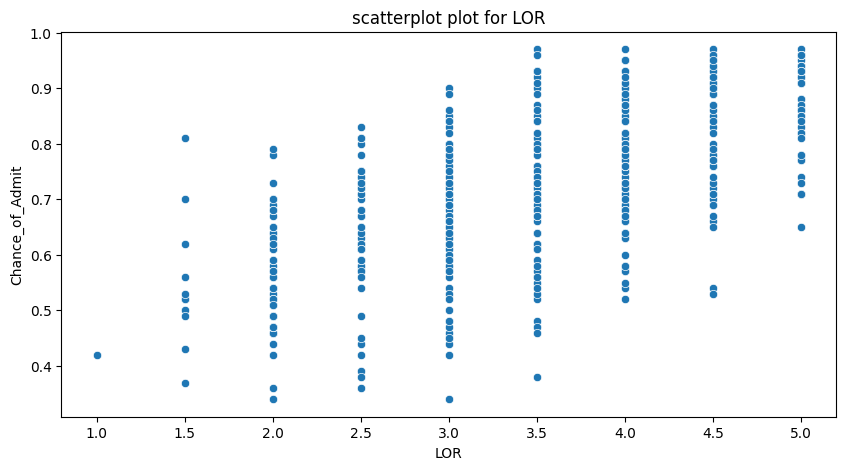

In [96]:
fir,ax=plt.subplots(figsize=(10,5))
sns.scatterplot(data=ds,x='LOR',y='Chance_of_Admit')
plt.title("scatterplot plot for LOR")
plt.show()

- There is no relationship between LOR & Chance_of_Admit.

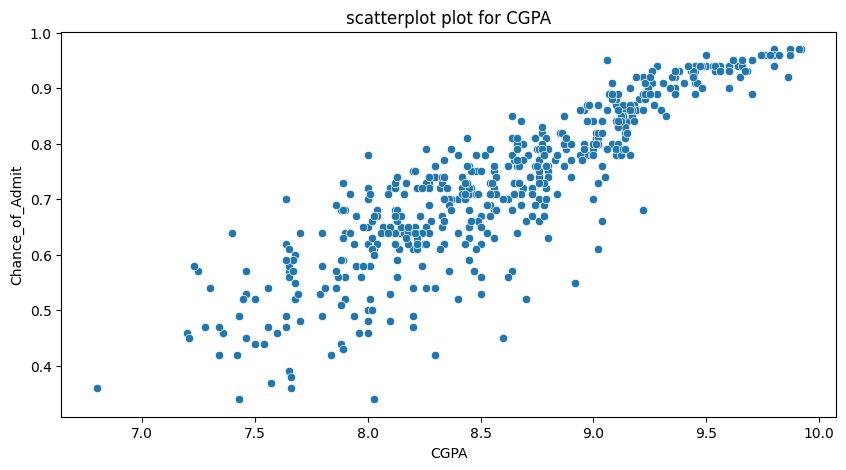

In [97]:
fir,ax=plt.subplots(figsize=(10,5))
sns.scatterplot(data=ds,x='CGPA',y='Chance_of_Admit')
plt.title("scatterplot plot for CGPA")
plt.show()

- Relationship between CGPA & Chance_of_Admit having passitive correlation.

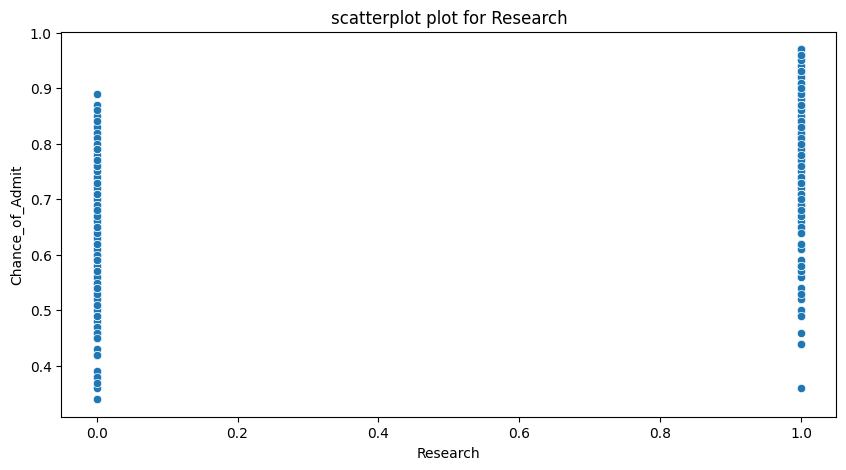

In [98]:
fir,ax=plt.subplots(figsize=(10,5))
sns.scatterplot(data=ds,x='Research',y='Chance_of_Admit')
plt.title("scatterplot plot for Research")
plt.show()

- There is no relationship between Research & Chance_of_Admit.

In [99]:
continuous_values=['SOP','LOR','CGPA','Chance_of_Admit']
discrete_count=['GRE_Score','TOEFL_Score','University_Rating','Research']

In [100]:
ds[continuous_values].describe()

,SOP,LOR,CGPA,Chance_of_Admit
count,500.000000,500.00000,500.000000,500.00000
mean,3.374000,3.48400,8.576440,0.72174
std,0.991004,0.92545,0.604813,0.14114
min,1.000000,1.00000,6.800000,0.34000
25%,2.500000,3.00000,8.127500,0.63000
50%,3.500000,3.50000,8.560000,0.72000
75%,4.000000,4.00000,9.040000,0.82000
max,5.000000,5.00000,9.920000,0.97000


In [101]:
ds[discrete_count].describe()

,GRE_Score,TOEFL_Score,University_Rating,Research
count,500.000000,500.000000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,0.560000
std,11.295148,6.081868,1.143512,0.496884
min,290.000000,92.000000,1.000000,0.000000
25%,308.000000,103.000000,2.000000,0.000000
50%,317.000000,107.000000,3.000000,1.000000
75%,325.000000,112.000000,4.000000,1.000000
max,340.000000,120.000000,5.000000,1.000000


In [102]:
ds['SOP'].unique().tolist()

[4.5, 4.0, 3.0, 3.5, 2.0, 5.0, 1.5, 1.0, 2.5]

- In SOP column, we are having 9 unique values.

In [103]:
ds['LOR'].unique().tolist()

[4.5, 3.5, 2.5, 3.0, 4.0, 1.5, 2.0, 5.0, 1.0]

- In LOR column, we are having 9 unique values.

In [104]:
ds['CGPA'].value_counts().count()

184

- In CGPA column, we are having 184 unique values. so, we can't able apply the filter method.

In [105]:
ds['Chance_of_Admit'].value_counts().count()

61

- In Chance_of_Admit column, we are having 61 unique values. so, we can't able apply the filter method.

In [106]:
ds['GRE_Score'].value_counts().count()

49

- In GRE_Score column, we are having 49 unique values. so, we can't able apply the filter method.

In [107]:
ds['TOEFL_Score'].value_counts().count()

29

- In TOEFL_Score column, we are having 29 unique values. so, we can't able apply the filter method.

In [108]:
ds['University_Rating'].unique().tolist()

[4, 3, 2, 5, 1]

- In University_Rating column, we are having 5 unique values.

In [109]:
ds['Research'].unique().tolist()

[1, 0]

- In Research column, we are having 2 unique values.

# Filter out method:-
## SOP:-

In [110]:
ds[ds['SOP']==1][['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA','Research','Chance_of_Admit']]

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
37,300,105,1,1.0,2.0,7.80,0,0.58
273,312,99,1,1.0,1.5,8.01,1,0.52
292,302,99,2,1.0,2.0,7.97,0,0.56
317,300,99,1,1.0,2.5,8.01,0,0.58
347,299,94,1,1.0,1.0,7.34,0,0.42
367,311,98,1,1.0,2.5,7.46,0,0.57


In [111]:
ds[ds['SOP']==1][['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA','Research','Chance_of_Admit']].count()

GRE_Score            6
TOEFL_Score          6
University_Rating    6
SOP                  6
LOR                  6
CGPA                 6
Research             6
Chance_of_Admit      6
dtype: int64

- In SOP==1, **(GRE_Score-299 to 312, TOEFL_Score-94 to 105, University_Rating-1 & 2, LOR-1 to 2, CGPA-7.34 to 8.01, Research-0 & 1)**, for this parameters we can get Chance_of_Admit from - 0.42 to 0.58 only and in this parameter 6 record are there.

In [112]:
ds[ds['SOP']==1.5][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']]

,GRE_Score,TOEFL_Score,University_Rating,LOR,CGPA,Research,Chance_of_Admit
27,298,98,2,2.5,7.50,1,0.44
29,310,99,2,2.0,7.30,0,0.54
51,312,100,2,3.5,7.90,1,0.56
79,294,93,1,2.0,7.36,0,0.46
95,304,100,4,2.5,7.84,0,0.42
122,310,106,4,2.5,8.36,0,0.57
137,316,100,2,3.0,8.16,1,0.71
159,297,100,1,2.0,7.90,0,0.52
160,315,103,1,2.0,7.86,0,0.57
161,298,99,1,3.0,7.46,0,0.53


In [113]:
ds[ds['SOP']==1.5][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']].count()

GRE_Score            25
TOEFL_Score          25
University_Rating    25
LOR                  25
CGPA                 25
Research             25
Chance_of_Admit      25
dtype: int64

In [114]:
ds[ds['SOP']==1.5][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']].min()

GRE_Score            290.00
TOEFL_Score           93.00
University_Rating      1.00
LOR                    1.50
CGPA                   7.23
Research               0.00
Chance_of_Admit        0.42
dtype: float64

In [115]:
ds[ds['SOP']==1.5][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']].max()

GRE_Score            332.00
TOEFL_Score          112.00
University_Rating      4.00
LOR                    4.00
CGPA                   8.66
Research               1.00
Chance_of_Admit        0.79
dtype: float64

- In SOP==1, **(GRE_Score-290 to 332, TOEFL_Score-93 to 112, University_Rating-1 & 4, LOR-1.50 to 4, CGPA-7.23 to 8.66, Research-0 & 1)**, for this parameters we can get Chance_of_Admit from - 0.42 to 0.79 only and in this parameter 25 record are there.

In [116]:
ds[ds['SOP']==2][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']]

,GRE_Score,TOEFL_Score,University_Rating,LOR,CGPA,Research,Chance_of_Admit
4,314,103,2,3.0,8.21,0,0.65
8,302,102,1,1.5,8.00,0,0.50
28,295,93,1,2.0,7.20,0,0.46
56,316,102,3,3.0,7.40,0,0.64
59,311,104,2,2.0,8.30,0,0.42
75,329,114,2,4.0,8.56,1,0.72
80,312,105,3,3.0,8.02,1,0.50
94,303,99,3,2.5,7.66,0,0.36
117,290,104,4,2.5,7.46,0,0.45
125,300,100,3,3.0,8.66,1,0.64


In [117]:
ds[ds['SOP']==2][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']].count()

GRE_Score            43
TOEFL_Score          43
University_Rating    43
LOR                  43
CGPA                 43
Research             43
Chance_of_Admit      43
dtype: int64

In [118]:
ds[ds['SOP']==2][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']].min()

GRE_Score            290.00
TOEFL_Score           92.00
University_Rating      1.00
LOR                    1.50
CGPA                   7.20
Research               0.00
Chance_of_Admit        0.36
dtype: float64

In [119]:
ds[ds['SOP']==2][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']].max()

GRE_Score            329.00
TOEFL_Score          114.00
University_Rating      4.00
LOR                    4.50
CGPA                   8.74
Research               1.00
Chance_of_Admit        0.81
dtype: float64

- In SOP==2, **(GRE_Score-290 to 329 TOEFL_Score-92 to 114, University_Rating-1 to 4, LOR-1.50 to 4.50, CGPA-7.20 to 8.74, Research-0 & 1)**, for this parameters we can get Chance_of_Admit from - 0.36 to 0.81 only and in this parameter 43 record are there.

In [120]:
ds[ds['SOP']==2.5][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']]

,GRE_Score,TOEFL_Score,University_Rating,LOR,CGPA,Research,Chance_of_Admit
41,316,105,2,2.5,8.20,1,0.49
42,313,107,2,2.0,8.50,1,0.53
50,313,98,3,4.5,8.30,1,0.76
101,312,105,2,3.0,8.12,0,0.64
124,301,106,4,3.0,8.47,0,0.57
...,...,...,...,...,...,...,...
485,311,101,2,3.5,8.34,1,0.70
486,319,102,3,2.5,8.37,0,0.68
490,307,105,2,4.5,8.12,1,0.67
492,298,101,4,4.5,7.69,1,0.53


In [121]:
ds[ds['SOP']==2.5][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']].count()

GRE_Score            64
TOEFL_Score          64
University_Rating    64
LOR                  64
CGPA                 64
Research             64
Chance_of_Admit      64
dtype: int64

In [122]:
ds[ds['SOP']==2.5][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']].min()

GRE_Score            295.00
TOEFL_Score           94.00
University_Rating      1.00
LOR                    1.50
CGPA                   7.43
Research               0.00
Chance_of_Admit        0.34
dtype: float64

In [123]:
ds[ds['SOP']==2.5][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']].max()

GRE_Score            324.00
TOEFL_Score          112.00
University_Rating      4.00
LOR                    4.50
CGPA                   9.02
Research               1.00
Chance_of_Admit        0.80
dtype: float64

- In SOP==2.5, **(GRE_Score-5 to 324 TOEFL_Score-94 to 112, University_Rating-1 to 4, LOR-1.50 to 4.50, CGPA-7.43 to 9.02, Research-0 & 1)**, for this parameters we can get Chance_of_Admit from - 0.34 to 0.80 only and in this parameter 64 record are there.

In [124]:
ds[ds['SOP']==3][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']]

,GRE_Score,TOEFL_Score,University_Rating,LOR,CGPA,Research,Chance_of_Admit
2,316,104,3,3.5,8.00,1,0.72
6,321,109,3,4.0,8.20,1,0.75
7,308,101,2,4.0,7.90,0,0.68
20,312,107,3,2.0,7.90,1,0.64
21,325,114,4,2.0,8.40,0,0.70
...,...,...,...,...,...,...,...
474,308,105,4,2.5,7.95,1,0.67
481,323,107,4,2.5,8.48,1,0.78
488,322,112,3,4.0,8.62,1,0.76
491,297,99,4,3.5,7.81,0,0.54


In [125]:
ds[ds['SOP']==3][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']].count()

GRE_Score            80
TOEFL_Score          80
University_Rating    80
LOR                  80
CGPA                 80
Research             80
Chance_of_Admit      80
dtype: int64

In [126]:
ds[ds['SOP']==3][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']].min()

GRE_Score            296.00
TOEFL_Score           95.00
University_Rating      1.00
LOR                    1.50
CGPA                   6.80
Research               0.00
Chance_of_Admit        0.36
dtype: float64

In [127]:
ds[ds['SOP']==3][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']].max()

GRE_Score            338.00
TOEFL_Score          118.00
University_Rating      5.00
LOR                    5.00
CGPA                   9.40
Research               1.00
Chance_of_Admit        0.91
dtype: float64

- In SOP==3, **(GRE_Score-296 to 338 TOEFL_Score-95 to 118, University_Rating-1 to 5, LOR-1.50 to 5, CGPA-6.80 to 9.40, Research-0 & 1)**, for this parameters we can get Chance_of_Admit from - 0.36 to 0.91 only and in this parameter 80 record are there.

In [128]:
ds[ds['SOP']==3.5][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']]

,GRE_Score,TOEFL_Score,University_Rating,LOR,CGPA,Research,Chance_of_Admit
3,322,110,3,2.5,8.67,1,0.80
9,323,108,3,3.0,8.60,0,0.45
10,325,106,3,4.0,8.40,1,0.52
14,311,104,3,2.0,8.20,1,0.61
15,314,105,3,2.5,8.30,0,0.54
...,...,...,...,...,...,...,...
475,300,101,3,2.5,7.88,0,0.59
477,309,105,4,2.0,8.18,0,0.65
480,321,102,3,4.0,9.01,1,0.80
484,317,106,3,3.0,7.89,1,0.73


In [129]:
ds[ds['SOP']==3.5][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']].count()

GRE_Score            88
TOEFL_Score          88
University_Rating    88
LOR                  88
CGPA                 88
Research             88
Chance_of_Admit      88
dtype: int64

In [130]:
ds[ds['SOP']==3.5][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']].min()

GRE_Score            298.00
TOEFL_Score           98.00
University_Rating      1.00
LOR                    2.00
CGPA                   7.68
Research               0.00
Chance_of_Admit        0.45
dtype: float64

In [131]:
ds[ds['SOP']==3.5][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']].max()

GRE_Score            338.00
TOEFL_Score          117.00
University_Rating      5.00
LOR                    5.00
CGPA                   9.46
Research               1.00
Chance_of_Admit        0.91
dtype: float64

- In SOP==3.5, **(GRE_Score-298 to 338 TOEFL_Score-98 to 117, University_Rating-1 to 5, LOR-2 to 5, CGPA-7.68 to 9.46, Research-0 & 1)**, for this parameters we can get Chance_of_Admit from - 0.45 to 0.91 only and in this parameter 88 record are there.

In [132]:
ds[ds['SOP']==4][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']]

,GRE_Score,TOEFL_Score,University_Rating,LOR,CGPA,Research,Chance_of_Admit
1,324,107,4,4.5,8.87,1,0.76
11,327,111,4,4.5,9.00,1,0.84
12,328,112,4,4.5,9.10,1,0.78
13,307,109,3,3.0,8.00,1,0.62
16,317,107,3,3.0,8.70,0,0.66
...,...,...,...,...,...,...,...
473,316,102,2,3.5,8.15,0,0.67
478,318,103,3,4.5,8.49,1,0.71
482,328,113,4,2.5,8.77,1,0.83
489,302,110,3,4.5,8.50,0,0.65


In [133]:
ds[ds['SOP']==4][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']].count()

GRE_Score            89
TOEFL_Score          89
University_Rating    89
LOR                  89
CGPA                 89
Research             89
Chance_of_Admit      89
dtype: int64

In [134]:
ds[ds['SOP']==4][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']].min()

GRE_Score            298.00
TOEFL_Score           98.00
University_Rating      2.00
LOR                    2.00
CGPA                   7.60
Research               0.00
Chance_of_Admit        0.34
dtype: float64

In [135]:
ds[ds['SOP']==4][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']].max()

GRE_Score            340.00
TOEFL_Score          120.00
University_Rating      5.00
LOR                    5.00
CGPA                   9.87
Research               1.00
Chance_of_Admit        0.97
dtype: float64

- In SOP==4, **(GRE_Score-298 to 340 TOEFL_Score-98 to 120, University_Rating-2 to 5, LOR-2.50 to 5, CGPA-7.60 to 9.87, Research-0 & 1)**, for this parameters we can get Chance_of_Admit from - 0.34 to 0.97 only and in this parameter 89 record are there.

In [136]:
ds[ds['SOP']==4.5][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']]

,GRE_Score,TOEFL_Score,University_Rating,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,9.65,1,0.92
5,330,115,5,3.0,9.34,1,0.90
25,340,120,5,4.5,9.60,1,0.94
26,322,109,5,3.5,8.80,0,0.76
43,332,117,4,4.0,9.10,0,0.87
...,...,...,...,...,...,...,...
451,324,113,4,4.5,9.25,1,0.89
479,325,110,4,4.0,8.96,1,0.79
495,332,108,5,4.0,9.02,1,0.87
497,330,120,5,5.0,9.56,1,0.93


In [137]:
ds[ds['SOP']==4.5][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']].count()

GRE_Score            63
TOEFL_Score          63
University_Rating    63
LOR                  63
CGPA                 63
Research             63
Chance_of_Admit      63
dtype: int64

In [138]:
ds[ds['SOP']==4.5][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']].min()

GRE_Score            308.00
TOEFL_Score          102.00
University_Rating      2.00
LOR                    3.00
CGPA                   8.14
Research               0.00
Chance_of_Admit        0.57
dtype: float64

In [139]:
ds[ds['SOP']==4.5][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']].max()

GRE_Score            340.00
TOEFL_Score          120.00
University_Rating      5.00
LOR                    5.00
CGPA                   9.92
Research               1.00
Chance_of_Admit        0.97
dtype: float64

- In SOP==4.5, **(GRE_Score-308 to 340 TOEFL_Score-102 to 120, University_Rating-2 to 5, LOR-3 to 5, CGPA-8.14 to 9.92, Research-0 & 1)**, for this parameters we can get Chance_of_Admit from - 0.57 to 0.97 only and in this parameter 63 record are there.

In [140]:
ds[ds['SOP']==5][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']]

,GRE_Score,TOEFL_Score,University_Rating,LOR,CGPA,Research,Chance_of_Admit
22,328,116,5,5.0,9.50,1,0.94
23,334,119,5,4.5,9.70,1,0.95
35,320,110,5,5.0,9.20,1,0.88
45,322,110,5,4.0,9.10,1,0.88
70,332,118,5,5.0,9.64,1,0.94
71,336,112,5,5.0,9.76,1,0.96
72,321,111,5,5.0,9.45,1,0.93
81,340,120,4,5.0,9.50,1,0.96
82,320,110,5,4.5,9.22,1,0.92
91,299,97,3,3.5,7.66,0,0.38


In [141]:
ds[ds['SOP']==5][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']].count()

GRE_Score            42
TOEFL_Score          42
University_Rating    42
LOR                  42
CGPA                 42
Research             42
Chance_of_Admit      42
dtype: int64

In [142]:
ds[ds['SOP']==5][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']].min()

GRE_Score            299.00
TOEFL_Score           97.00
University_Rating      3.00
LOR                    3.00
CGPA                   7.66
Research               0.00
Chance_of_Admit        0.38
dtype: float64

In [143]:
ds[ds['SOP']==5][['GRE_Score','TOEFL_Score','University_Rating','LOR','CGPA','Research','Chance_of_Admit']].max()

GRE_Score            340.00
TOEFL_Score          120.00
University_Rating      5.00
LOR                    5.00
CGPA                   9.87
Research               1.00
Chance_of_Admit        0.96
dtype: float64

- In SOP==5, **(GRE_Score-299 to 340 TOEFL_Score-97 to 120, University_Rating-3 to 5, LOR-3.00 to 5, CGPA-7.66 to 9.87, Research-0 & 1)**, for this parameters we can get Chance_of_Admit from - 0.38 to 0.96 only and in this parameter 42 record are there.

## LOR:-

In [144]:
ds[ds['LOR']==1][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']]

,GRE_Score,TOEFL_Score,University_Rating,SOP,CGPA,Research,Chance_of_Admit
347,299,94,1,1.0,7.34,0,0.42


- In LOR==1, **(GRE_Score-299 TOEFL_Score-94, University_Rating-1, SOP-1.0, CGPA-7.34, Research-0 & 1)**, for this parameters we can get Chance_of_Admit from - 0.42 only and in this parameter 1 record are there.

In [145]:
ds[ds['LOR']==1.5][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']]

,GRE_Score,TOEFL_Score,University_Rating,SOP,CGPA,Research,Chance_of_Admit
8,302,102,1,2.0,8.00,0,0.50
38,304,105,1,3.0,7.50,0,0.52
263,324,111,3,2.5,8.79,1,0.70
272,294,95,1,1.5,7.64,0,0.49
273,312,99,1,1.0,8.01,1,0.52
329,297,96,2,2.5,7.89,0,0.43
359,321,107,2,2.0,8.44,0,0.81
411,313,94,2,2.5,8.13,0,0.56
440,305,104,2,2.5,7.79,0,0.53
457,295,99,1,2.0,7.57,0,0.37


In [146]:
ds[ds['LOR']==1.5][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']].count()

GRE_Score            11
TOEFL_Score          11
University_Rating    11
SOP                  11
CGPA                 11
Research             11
Chance_of_Admit      11
dtype: int64

In [147]:
ds[ds['LOR']==1.5][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']].min()

GRE_Score            294.00
TOEFL_Score           94.00
University_Rating      1.00
SOP                    1.00
CGPA                   7.50
Research               0.00
Chance_of_Admit        0.37
dtype: float64

In [148]:
ds[ds['LOR']==1.5][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']].max()

GRE_Score            324.00
TOEFL_Score          111.00
University_Rating      3.00
SOP                    3.00
CGPA                   8.79
Research               1.00
Chance_of_Admit        0.81
dtype: float64

- In LOR==1.5, **(GRE_Score-294 to 324 TOEFL_Score-94 to 111, University_Rating-1 to 3, SOP-1.00 to 3, CGPA-7.50 to 8.79, Research-0 & 1)**, for this parameters we can get Chance_of_Admit from - 0.37 to 0.81 only and in this parameter 11 record are there.

In [149]:
ds[ds['LOR']==2][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']]

,GRE_Score,TOEFL_Score,University_Rating,SOP,CGPA,Research,Chance_of_Admit
14,311,104,3,3.5,8.20,1,0.61
20,312,107,3,3.0,7.90,1,0.64
21,325,114,4,3.0,8.40,0,0.70
28,295,93,1,2.0,7.20,0,0.46
29,310,99,2,1.5,7.30,0,0.54
37,300,105,1,1.0,7.80,0,0.58
42,313,107,2,2.5,8.50,1,0.53
57,298,99,2,4.0,7.60,0,0.46
58,300,99,1,3.0,6.80,1,0.36
59,311,104,2,2.0,8.30,0,0.42


In [150]:
ds[ds['LOR']==2][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']].count()

GRE_Score            46
TOEFL_Score          46
University_Rating    46
SOP                  46
CGPA                 46
Research             46
Chance_of_Admit      46
dtype: int64

In [151]:
ds[ds['LOR']==2][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']].min()

GRE_Score            290.00
TOEFL_Score           92.00
University_Rating      1.00
SOP                    1.00
CGPA                   6.80
Research               0.00
Chance_of_Admit        0.34
dtype: float64

In [152]:
ds[ds['LOR']==2][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']].max()

GRE_Score            325.00
TOEFL_Score          114.00
University_Rating      4.00
SOP                    4.00
CGPA                   8.80
Research               1.00
Chance_of_Admit        0.79
dtype: float64

- In LOR==2, **(GRE_Score-290 to 325 TOEFL_Score-92 to 114, University_Rating-1 to 4, SOP-1.00 to 4, CGPA-6.80 to 8.780, Research-0 & 1)**, for this parameters we can get Chance_of_Admit from - 0.34 to 0.79 only and in this parameter 46 record are there.

In [153]:
ds[ds['LOR']==2.5][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']]

,GRE_Score,TOEFL_Score,University_Rating,SOP,CGPA,Research,Chance_of_Admit
3,322,110,3,3.5,8.67,1,0.80
15,314,105,3,3.5,8.30,0,0.54
27,298,98,2,1.5,7.50,1,0.44
41,316,105,2,2.5,8.20,1,0.49
53,324,112,4,4.0,8.10,1,0.72
94,303,99,3,2.0,7.66,0,0.36
95,304,100,4,1.5,7.84,0,0.42
117,290,104,4,2.0,7.46,0,0.45
122,310,106,4,1.5,8.36,0,0.57
145,320,113,2,2.0,8.64,1,0.81


In [154]:
ds[ds['LOR']==2.5][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']].count()

GRE_Score            50
TOEFL_Score          50
University_Rating    50
SOP                  50
CGPA                 50
Research             50
Chance_of_Admit      50
dtype: int64

In [155]:
ds[ds['LOR']==2.5][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']].min()

GRE_Score            290.00
TOEFL_Score           98.00
University_Rating      1.00
SOP                    1.00
CGPA                   7.46
Research               0.00
Chance_of_Admit        0.36
dtype: float64

In [156]:
ds[ds['LOR']==2.5][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']].max()

GRE_Score            328.00
TOEFL_Score          113.00
University_Rating      4.00
SOP                    4.00
CGPA                   9.02
Research               1.00
Chance_of_Admit        0.83
dtype: float64

- In LOR==2.5, **(GRE_Score-290 to 328 TOEFL_Score-98 to 113, University_Rating-1 to 4, SOP-1.00 to 4, CGPA-7.46 to 9.02, Research-0 & 1)**, for this parameters we can get Chance_of_Admit from - 0.36 to 0.83 only and in this parameter 50 record are there.

In [157]:
ds[ds['LOR']==3][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']]

,GRE_Score,TOEFL_Score,University_Rating,SOP,CGPA,Research,Chance_of_Admit
4,314,103,2,2.0,8.21,0,0.65
5,330,115,5,4.5,9.34,1,0.90
9,323,108,3,3.5,8.60,0,0.45
13,307,109,3,4.0,8.00,1,0.62
16,317,107,3,4.0,8.70,0,0.66
...,...,...,...,...,...,...,...
462,307,105,4,3.0,7.94,0,0.62
463,304,107,3,3.5,7.86,0,0.57
464,298,97,2,2.0,7.21,0,0.45
483,304,103,5,5.0,7.92,0,0.71


In [158]:
ds[ds['LOR']==3][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']].count()

GRE_Score            99
TOEFL_Score          99
University_Rating    99
SOP                  99
CGPA                 99
Research             99
Chance_of_Admit      99
dtype: int64

In [159]:
ds[ds['LOR']==3][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']].min()

GRE_Score            295.00
TOEFL_Score           97.00
University_Rating      1.00
SOP                    1.50
CGPA                   7.21
Research               0.00
Chance_of_Admit        0.34
dtype: float64

In [160]:
ds[ds['LOR']==3][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']].max()

GRE_Score            334.00
TOEFL_Score          116.00
University_Rating      5.00
SOP                    5.00
CGPA                   9.34
Research               1.00
Chance_of_Admit        0.90
dtype: float64

- In LOR==3, **(GRE_Score-295 to 334 TOEFL_Score-97 to 116, University_Rating-1 to 5, SOP-1.50 to 5, CGPA-7.21 to 9.34, Research-0 & 1)**, for this parameters we can get Chance_of_Admit from - 0.34 to 0.90 only and in this parameter 99 record are there.

In [161]:
ds[ds['LOR']==3.5][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']]

,GRE_Score,TOEFL_Score,University_Rating,SOP,CGPA,Research,Chance_of_Admit
2,316,104,3,3.0,8.00,1,0.72
24,336,119,5,4.0,9.80,1,0.97
26,322,109,5,4.5,8.80,0,0.76
39,307,108,2,4.0,7.70,0,0.48
51,312,100,2,1.5,7.90,1,0.56
...,...,...,...,...,...,...,...
459,329,113,4,4.0,9.36,1,0.89
469,326,114,4,4.0,9.16,1,0.86
473,316,102,2,4.0,8.15,0,0.67
485,311,101,2,2.5,8.34,1,0.70


In [162]:
ds[ds['LOR']==3.5][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']].count()

GRE_Score            86
TOEFL_Score          86
University_Rating    86
SOP                  86
CGPA                 86
Research             86
Chance_of_Admit      86
dtype: int64

In [163]:
ds[ds['LOR']==3.5][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']].min()

GRE_Score            296.00
TOEFL_Score           97.00
University_Rating      1.00
SOP                    1.50
CGPA                   7.28
Research               0.00
Chance_of_Admit        0.38
dtype: float64

In [164]:
ds[ds['LOR']==3.5][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']].max()

GRE_Score            339.00
TOEFL_Score          119.00
University_Rating      5.00
SOP                    5.00
CGPA                   9.80
Research               1.00
Chance_of_Admit        0.97
dtype: float64

- In LOR==3.5, **(GRE_Score-296 to 339 TOEFL_Score-97 to 119, University_Rating-1 to 5, SOP-1.50 to 5, CGPA-7.28 to 9.80, Research-0 & 1)**, for this parameters we can get Chance_of_Admit from - 0.38 to 0.97 only and in this parameter 86 record are there.

In [165]:
ds[ds['LOR']==4][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']]

,GRE_Score,TOEFL_Score,University_Rating,SOP,CGPA,Research,Chance_of_Admit
6,321,109,3,3.0,8.20,1,0.75
7,308,101,2,3.0,7.90,0,0.68
10,325,106,3,3.5,8.40,1,0.52
31,327,103,3,4.0,8.30,1,0.74
33,340,114,5,4.0,9.60,1,0.90
...,...,...,...,...,...,...,...
479,325,110,4,4.5,8.96,1,0.79
480,321,102,3,3.5,9.01,1,0.80
487,327,115,4,3.5,9.14,0,0.79
488,322,112,3,3.0,8.62,1,0.76


In [166]:
ds[ds['LOR']==4][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']].count()

GRE_Score            94
TOEFL_Score          94
University_Rating    94
SOP                  94
CGPA                 94
Research             94
Chance_of_Admit      94
dtype: int64

In [167]:
ds[ds['LOR']==4][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']].min()

GRE_Score            293.00
TOEFL_Score           96.00
University_Rating      1.00
SOP                    1.50
CGPA                   7.23
Research               0.00
Chance_of_Admit        0.52
dtype: float64

In [168]:
ds[ds['LOR']==4][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']].max()

GRE_Score            340.00
TOEFL_Score          120.00
University_Rating      5.00
SOP                    5.00
CGPA                   9.92
Research               1.00
Chance_of_Admit        0.97
dtype: float64

- In LOR==4, **(GRE_Score-293 to 340 TOEFL_Score-96 to 120, University_Rating-1 to 5, SOP-1.50 to 5, CGPA-7.23 to 9.92, Research-0 & 1)**, for this parameters we can get Chance_of_Admit from - 0.52 to 0.97 only and in this parameter 94 record are there.

In [169]:
ds[ds['LOR']==4.5][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']]

,GRE_Score,TOEFL_Score,University_Rating,SOP,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,9.65,1,0.92
1,324,107,4,4.0,8.87,1,0.76
11,327,111,4,4.0,9.00,1,0.84
12,328,112,4,4.0,9.10,1,0.78
23,334,119,5,5.0,9.70,1,0.95
...,...,...,...,...,...,...,...
478,318,103,3,4.0,8.49,1,0.71
489,302,110,3,4.0,8.50,0,0.65
490,307,105,2,2.5,8.12,1,0.67
492,298,101,4,2.5,7.69,1,0.53


In [170]:
ds[ds['LOR']==4.5][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']].count()

GRE_Score            63
TOEFL_Score          63
University_Rating    63
SOP                  63
CGPA                 63
Research             63
Chance_of_Admit      63
dtype: int64

In [171]:
ds[ds['LOR']==4.5][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']].min()

GRE_Score            298.00
TOEFL_Score           96.00
University_Rating      2.00
SOP                    2.00
CGPA                   7.69
Research               0.00
Chance_of_Admit        0.53
dtype: float64

In [172]:
ds[ds['LOR']==4.5][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']].max()

GRE_Score            340.00
TOEFL_Score          120.00
University_Rating      5.00
SOP                    5.00
CGPA                   9.91
Research               1.00
Chance_of_Admit        0.97
dtype: float64

- In LOR==4.5, **(GRE_Score-298 to 340 TOEFL_Score-96 to 120, University_Rating-2 to 5, SOP-2 to 5, CGPA-7.69 to 9.91, Research-0 & 1)**, for this parameters we can get Chance_of_Admit from - 0.53 to 0.97 only and in this parameter 63 record are there.

In [173]:
ds[ds['LOR']==5][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']]

,GRE_Score,TOEFL_Score,University_Rating,SOP,CGPA,Research,Chance_of_Admit
22,328,116,5,5.0,9.50,1,0.94
34,331,112,5,4.0,9.80,1,0.94
35,320,110,5,5.0,9.20,1,0.88
46,329,114,5,4.0,9.30,1,0.86
48,321,110,3,3.5,8.85,1,0.82
70,332,118,5,5.0,9.64,1,0.94
71,336,112,5,5.0,9.76,1,0.96
72,321,111,5,5.0,9.45,1,0.93
74,314,106,3,3.0,8.90,0,0.74
81,340,120,4,5.0,9.50,1,0.96


In [174]:
ds[ds['LOR']==5][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']].count()

GRE_Score            50
TOEFL_Score          50
University_Rating    50
SOP                  50
CGPA                 50
Research             50
Chance_of_Admit      50
dtype: int64

In [175]:
ds[ds['LOR']==5][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']].min()

GRE_Score            302.00
TOEFL_Score          100.00
University_Rating      3.00
SOP                    3.00
CGPA                   8.33
Research               0.00
Chance_of_Admit        0.65
dtype: float64

In [176]:
ds[ds['LOR']==5][['GRE_Score','TOEFL_Score','University_Rating','SOP','CGPA','Research','Chance_of_Admit']].max()

GRE_Score            340.00
TOEFL_Score          120.00
University_Rating      5.00
SOP                    5.00
CGPA                   9.87
Research               1.00
Chance_of_Admit        0.97
dtype: float64

- In LOR==5, **(GRE_Score-302 to 340 TOEFL_Score-100 to 120, University_Rating-3 to 5, SOP-3 to 5, CGPA-8.33 to 9.87, Research-0 & 1)**, for this parameters we can get Chance_of_Admit from - 0.65 to 0.97 only and in this parameter 50 record are there.

In [177]:
ds[ds['University_Rating']==1][['GRE_Score','TOEFL_Score','SOP','LOR','CGPA','Research','Chance_of_Admit']]

,GRE_Score,TOEFL_Score,SOP,LOR,CGPA,Research,Chance_of_Admit
8,302,102,2.0,1.5,8.00,0,0.50
28,295,93,2.0,2.0,7.20,0,0.46
37,300,105,1.0,2.0,7.80,0,0.58
38,304,105,3.0,1.5,7.50,0,0.52
58,300,99,3.0,2.0,6.80,1,0.36
79,294,93,1.5,2.0,7.36,0,0.46
139,318,109,3.5,3.5,9.12,0,0.78
159,297,100,1.5,2.0,7.90,0,0.52
160,315,103,1.5,2.0,7.86,0,0.57
161,298,99,1.5,3.0,7.46,0,0.53


In [178]:
ds[ds['University_Rating']==1][['GRE_Score','TOEFL_Score','SOP','LOR','CGPA','Research','Chance_of_Admit']].count()

GRE_Score          34
TOEFL_Score        34
SOP                34
LOR                34
CGPA               34
Research           34
Chance_of_Admit    34
dtype: int64

In [179]:
ds[ds['University_Rating']==1][['GRE_Score','TOEFL_Score','SOP','LOR','CGPA','Research','Chance_of_Admit']].min()

GRE_Score          290.00
TOEFL_Score         92.00
SOP                  1.00
LOR                  1.00
CGPA                 6.80
Research             0.00
Chance_of_Admit      0.36
dtype: float64

In [180]:
ds[ds['University_Rating']==1][['GRE_Score','TOEFL_Score','SOP','LOR','CGPA','Research','Chance_of_Admit']].max()

GRE_Score          332.00
TOEFL_Score        112.00
SOP                  3.50
LOR                  4.00
CGPA                 9.12
Research             1.00
Chance_of_Admit      0.79
dtype: float64

- In University_Rating==1, **(GRE_Score-290 to 332 TOEFL_Score-92 to 112, SOP-1 to 3.50, LOR-1 to 4, CGPA-6.80 to 9.12, Research-0 & 1)**, for this parameters we can get Chance_of_Admit from - 0.36 to 0.79 only and in this parameter 34 record are there.

In [181]:
ds[ds['University_Rating']==2][['GRE_Score','TOEFL_Score','SOP','LOR','CGPA','Research','Chance_of_Admit']]

,GRE_Score,TOEFL_Score,SOP,LOR,CGPA,Research,Chance_of_Admit
4,314,103,2.0,3.0,8.21,0,0.65
7,308,101,3.0,4.0,7.90,0,0.68
27,298,98,1.5,2.5,7.50,1,0.44
29,310,99,1.5,2.0,7.30,0,0.54
30,300,97,3.0,3.0,8.10,1,0.65
...,...,...,...,...,...,...,...
464,298,97,2.0,3.0,7.21,0,0.45
473,316,102,4.0,3.5,8.15,0,0.67
485,311,101,2.5,3.5,8.34,1,0.70
490,307,105,2.5,4.5,8.12,1,0.67


In [182]:
ds[ds['University_Rating']==2][['GRE_Score','TOEFL_Score','SOP','LOR','CGPA','Research','Chance_of_Admit']].count()

GRE_Score          126
TOEFL_Score        126
SOP                126
LOR                126
CGPA               126
Research           126
Chance_of_Admit    126
dtype: int64

In [183]:
ds[ds['University_Rating']==2][['GRE_Score','TOEFL_Score','SOP','LOR','CGPA','Research','Chance_of_Admit']].min()

GRE_Score          293.00
TOEFL_Score         94.00
SOP                  1.00
LOR                  1.50
CGPA                 7.21
Research             0.00
Chance_of_Admit      0.34
dtype: float64

In [184]:
ds[ds['University_Rating']==2][['GRE_Score','TOEFL_Score','SOP','LOR','CGPA','Research','Chance_of_Admit']].max()

GRE_Score          332.00
TOEFL_Score        118.00
SOP                  4.50
LOR                  4.50
CGPA                 9.36
Research             1.00
Chance_of_Admit      0.90
dtype: float64

- In University_Rating==2, **(GRE_Score-293 to 332 TOEFL_Score-94 to 118, SOP-1 to 4.50, LOR-1.50 to 4.50, CGPA-7.21 to 9.36, Research-0 & 1)**, for this parameters we can get Chance_of_Admit from - 0.34 to 0.90 only and in this parameter 126 record are there.

In [185]:
ds[ds['University_Rating']==3][['GRE_Score','TOEFL_Score','SOP','LOR','CGPA','Research','Chance_of_Admit']]

,GRE_Score,TOEFL_Score,SOP,LOR,CGPA,Research,Chance_of_Admit
2,316,104,3.0,3.5,8.00,1,0.72
3,322,110,3.5,2.5,8.67,1,0.80
6,321,109,3.0,4.0,8.20,1,0.75
9,323,108,3.5,3.0,8.60,0,0.45
10,325,106,3.5,4.0,8.40,1,0.52
...,...,...,...,...,...,...,...
484,317,106,3.5,3.0,7.89,1,0.73
486,319,102,2.5,2.5,8.37,0,0.68
488,322,112,3.0,4.0,8.62,1,0.76
489,302,110,4.0,4.5,8.50,0,0.65


In [186]:
ds[ds['University_Rating']==3][['GRE_Score','TOEFL_Score','SOP','LOR','CGPA','Research','Chance_of_Admit']].count()

GRE_Score          162
TOEFL_Score        162
SOP                162
LOR                162
CGPA               162
Research           162
Chance_of_Admit    162
dtype: int64

In [187]:
ds[ds['University_Rating']==3][['GRE_Score','TOEFL_Score','SOP','LOR','CGPA','Research','Chance_of_Admit']].min()

GRE_Score          297.00
TOEFL_Score         97.00
SOP                  2.00
LOR                  1.50
CGPA                 7.40
Research             0.00
Chance_of_Admit      0.36
dtype: float64

In [188]:
ds[ds['University_Rating']==3][['GRE_Score','TOEFL_Score','SOP','LOR','CGPA','Research','Chance_of_Admit']].max()

GRE_Score          331.00
TOEFL_Score        120.00
SOP                  5.00
LOR                  5.00
CGPA                 9.32
Research             1.00
Chance_of_Admit      0.90
dtype: float64

- In University_Rating==3, **(GRE_Score-297 to 331 TOEFL_Score-97 to 120, SOP-2 to 5, LOR-1.50 to 5, CGPA-7.40 to 9.32, Research-0 & 1)**, for this parameters we can get Chance_of_Admit from - 0.36 to 0.90 only and in this parameter 162 record are there.

In [189]:
ds[ds['University_Rating']==4][['GRE_Score','TOEFL_Score','SOP','LOR','CGPA','Research','Chance_of_Admit']]

,GRE_Score,TOEFL_Score,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4.5,4.5,9.65,1,0.92
1,324,107,4.0,4.5,8.87,1,0.76
11,327,111,4.0,4.5,9.00,1,0.84
12,328,112,4.0,4.5,9.10,1,0.78
21,325,114,3.0,2.0,8.40,0,0.70
...,...,...,...,...,...,...,...
487,327,115,3.5,4.0,9.14,0,0.79
491,297,99,3.0,3.5,7.81,0,0.54
492,298,101,2.5,4.5,7.69,1,0.53
498,312,103,4.0,5.0,8.43,0,0.73


In [190]:
ds[ds['University_Rating']==4][['GRE_Score','TOEFL_Score','SOP','LOR','CGPA','Research','Chance_of_Admit']].count()

GRE_Score          105
TOEFL_Score        105
SOP                105
LOR                105
CGPA               105
Research           105
Chance_of_Admit    105
dtype: int64

In [191]:
ds[ds['University_Rating']==4][['GRE_Score','TOEFL_Score','SOP','LOR','CGPA','Research','Chance_of_Admit']].min()

GRE_Score          290.00
TOEFL_Score         96.00
SOP                  1.50
LOR                  2.00
CGPA                 7.46
Research             0.00
Chance_of_Admit      0.42
dtype: float64

In [192]:
ds[ds['University_Rating']==4][['GRE_Score','TOEFL_Score','SOP','LOR','CGPA','Research','Chance_of_Admit']].max()

GRE_Score          340.00
TOEFL_Score        120.00
SOP                  5.00
LOR                  5.00
CGPA                 9.92
Research             1.00
Chance_of_Admit      0.97
dtype: float64

- In University_Rating==4, **(GRE_Score-290 to 340 TOEFL_Score-96 to 120, SOP-1.50 to 5, LOR-2 to 5, CGPA-7.46 to 9.92, Research-0 & 1)**, for this parameters we can get Chance_of_Admit from - 0.42 to 0.97 only and in this parameter 105 record are there.

In [193]:
ds[ds['University_Rating']==5][['GRE_Score','TOEFL_Score','SOP','LOR','CGPA','Research','Chance_of_Admit']]

,GRE_Score,TOEFL_Score,SOP,LOR,CGPA,Research,Chance_of_Admit
5,330,115,4.5,3.0,9.34,1,0.90
22,328,116,5.0,5.0,9.50,1,0.94
23,334,119,5.0,4.5,9.70,1,0.95
24,336,119,4.0,3.5,9.80,1,0.97
25,340,120,4.5,4.5,9.60,1,0.94
...,...,...,...,...,...,...,...
470,320,110,4.0,4.0,9.27,1,0.87
483,304,103,5.0,3.0,7.92,0,0.71
495,332,108,4.5,4.0,9.02,1,0.87
496,337,117,5.0,5.0,9.87,1,0.96


In [194]:
ds[ds['University_Rating']==5][['GRE_Score','TOEFL_Score','SOP','LOR','CGPA','Research','Chance_of_Admit']].count()

GRE_Score          73
TOEFL_Score        73
SOP                73
LOR                73
CGPA               73
Research           73
Chance_of_Admit    73
dtype: int64

In [195]:
ds[ds['University_Rating']==5][['GRE_Score','TOEFL_Score','SOP','LOR','CGPA','Research','Chance_of_Admit']].min()

GRE_Score          303.00
TOEFL_Score        101.00
SOP                  3.00
LOR                  3.00
CGPA                 7.92
Research             0.00
Chance_of_Admit      0.61
dtype: float64

In [196]:
ds[ds['University_Rating']==5][['GRE_Score','TOEFL_Score','SOP','LOR','CGPA','Research','Chance_of_Admit']].max()

GRE_Score          340.00
TOEFL_Score        120.00
SOP                  5.00
LOR                  5.00
CGPA                 9.91
Research             1.00
Chance_of_Admit      0.97
dtype: float64

- In University_Rating==5, **(GRE_Score-303 to 340 TOEFL_Score-101 to 120, SOP-3 to 5, LOR-3 to 5, CGPA-7.92 to 9.91, Research-0 & 1)**, for this parameters we can get Chance_of_Admit from - 0.61 to 0.97 only and in this parameter 73 record are there.

In [197]:
ds[ds['Research']==0][['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA','Chance_of_Admit']]

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Chance_of_Admit
4,314,103,2,2.0,3.0,8.21,0.65
7,308,101,2,3.0,4.0,7.90,0.68
8,302,102,1,2.0,1.5,8.00,0.50
9,323,108,3,3.5,3.0,8.60,0.45
15,314,105,3,3.5,2.5,8.30,0.54
...,...,...,...,...,...,...,...
487,327,115,4,3.5,4.0,9.14,0.79
489,302,110,3,4.0,4.5,8.50,0.65
491,297,99,4,3.0,3.5,7.81,0.54
498,312,103,4,4.0,5.0,8.43,0.73


In [198]:
ds[ds['Research']==0][['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA','Chance_of_Admit']].count()

GRE_Score            220
TOEFL_Score          220
University_Rating    220
SOP                  220
LOR                  220
CGPA                 220
Chance_of_Admit      220
dtype: int64

In [199]:
ds[ds['Research']==0][['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA','Chance_of_Admit']].min()

GRE_Score            290.00
TOEFL_Score           92.00
University_Rating      1.00
SOP                    1.00
LOR                    1.00
CGPA                   7.20
Chance_of_Admit        0.34
dtype: float64

In [200]:
ds[ds['Research']==0][['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA','Chance_of_Admit']].max()

GRE_Score            339.00
TOEFL_Score          120.00
University_Rating      5.00
SOP                    5.00
LOR                    5.00
CGPA                   9.70
Chance_of_Admit        0.89
dtype: float64

- In Research==0, **(GRE_Score-290 to 339 TOEFL_Score-92 to 120, University_Rating-1 to 5 , SOP-1 to 5, LOR-1 to 5, CGPA-7.20 to 9.70, Research-0 & 1)**, for this parameters we can get Chance_of_Admit from - 0.34 to 0.89 only and in this parameter 220 record are there.

In [201]:
ds[ds['Research']==1][['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA','Chance_of_Admit']]

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,0.92
1,324,107,4,4.0,4.5,8.87,0.76
2,316,104,3,3.0,3.5,8.00,0.72
3,322,110,3,3.5,2.5,8.67,0.80
5,330,115,5,4.5,3.0,9.34,0.90
...,...,...,...,...,...,...,...
493,300,95,2,3.0,1.5,8.22,0.62
494,301,99,3,2.5,2.0,8.45,0.68
495,332,108,5,4.5,4.0,9.02,0.87
496,337,117,5,5.0,5.0,9.87,0.96


In [202]:
ds[ds['Research']==1][['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA','Chance_of_Admit']].count()

GRE_Score            280
TOEFL_Score          280
University_Rating    280
SOP                  280
LOR                  280
CGPA                 280
Chance_of_Admit      280
dtype: int64

In [203]:
ds[ds['Research']==1][['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA','Chance_of_Admit']].min()

GRE_Score            293.00
TOEFL_Score           95.00
University_Rating      1.00
SOP                    1.00
LOR                    1.50
CGPA                   6.80
Chance_of_Admit        0.36
dtype: float64

In [204]:
ds[ds['Research']==1][['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA','Chance_of_Admit']].max()

GRE_Score            340.00
TOEFL_Score          120.00
University_Rating      5.00
SOP                    5.00
LOR                    5.00
CGPA                   9.92
Chance_of_Admit        0.97
dtype: float64

- In Research==1, **(GRE_Score-293 to 340 TOEFL_Score-95 to 120, University_Rating-1 to 5 , SOP-1 to 5, LOR-1.50 to 5, CGPA-6.80 to 9.92, Research-0 & 1)**, for this parameters we can get Chance_of_Admit from - 0.36 to 0.97 only and in this parameter 280 record are there.

In [205]:
class lor_outliers:

   

    lor_q1=ds['LOR'].quantile(q=0.25)
    lor_q2=ds['LOR'].quantile(q=0.50)
    lor_q3=ds['LOR'].quantile(q=0.75)
    

    lor_iqr=lor_q3-lor_q1

    lor_lower_bound=lor_q1-(1.5*lor_iqr)

    lor_upper_bound=lor_q3+(1.5*lor_iqr)

                  
    def __init__(self,lor_q1,lor_q2,lor_q3,lor_iqr,lor_lower_bound,lor_upper_bound):
        
        self.lor_q1=lor_q1
        self.lor_q2=lor_q2
        self.lor_q3=lor_q3
        self.lor_iqr=lor_iqr
        self.lor_lower_bound=lor_lower_bound
        self.lor_upper_bound=lor_upper_bound
        
        
        
    def lor_quantile_one(self):
        return self.lor_q1
    def lor_quantile_two(self):
        return self.lor_q2
    def lor_quantile_three(self):
        return self.lor_q3
    def lor_inter_quantile_range(self):
        return self.lor_iqr
    def lor_lower_fen(self):
        return self.lor_lower_bound
    def lor_upper_fen(self):
        return self.lor_upper_bound


In [206]:
lor_outliers.lor_lower_bound

1.5

In [207]:
lor_outliers.lor_upper_bound

5.5

In [208]:
ds[(ds['LOR']<lor_outliers.lor_lower_bound) | (ds['LOR']>lor_outliers.lor_upper_bound)]

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
347,348,299,94,1,1.0,1.0,7.34,0,0.42


In [209]:
ds.drop(index=347)

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [210]:
ds['LOR']=ds['LOR'].clip(lower=lor_outliers.lor_lower_bound,upper=lor_outliers.lor_upper_bound)

In [211]:
ds

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


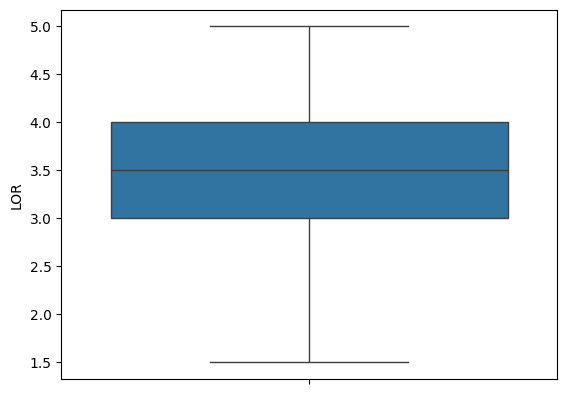

In [212]:
sns.boxplot(data=ds['LOR'])
plt.show()

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso,LassoCV,Ridge,RidgeCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score, cross_validate,GridSearchCV,train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures



X=ds.drop(columns=['Serial No.','Chance_of_Admit','SOP'])
y=ds['Chance_of_Admit']


class Linear_Regression:

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=True)

    lr=LinearRegression()
    lr.fit(X_train,y_train)
    lr_intercept=lr.intercept_
    lr_coefficient=lr.coef_
    train_pred=lr.predict(X_train)
    train_score=lr.score(X_train,y_train)
    R2_train_score=r2_score(y_train,train_pred)
    test_pred=lr.predict(X_test)
    test_score=lr.score(X_test,y_test)
    R2_test_score=r2_score(y_test,test_pred)
    cross_score=cross_val_score(lr,X,y,cv=5)
    train_residual=y_train-train_pred
    test_residual=y_test-test_pred
    
    def __init__(self,lr,lr_intercept,lr_coefficient,train_pred,train_score,R2_train_score,test_pred,test_score,R2_test_score,
                 cross_score,train_residual,test_residual):
        
        self.lr=lr
        self.lr_intercept=lr_intercept
        self.lr_coefficient=lr_coefficient
        self.train_pred=train_pred
        self.train_score=train_score
        self.R2_train_score=R2_train_score
        self.test_pred=test_pred
        self.test_score=test_score
        self.R2_test_score=R2_test_score
        self.cross_score=cross_score
        self.train_residual=train_residual
        self.test_residual=test_residual

    def linear_model(self):
        return self.lr
    
    def linear_intercept(self):
        return self.lr_intercept
    
    def linear_coefficient(self):
        return self.lr_coefficient
    
    def train_prediction(self):
        return self.train_pred
    
    def train_scoring(self):
        return self.train_score
    
    def R2_training_scoring(self):
        return self.R2_train_score
    
    def test_prediction(self):
        return self.test_pred
    
    def test_scoring(self):
        return self.test_score
    
    def R2_testing_scoring(self):
        return self.R2_test_score
    
    def cross_validation_scoring(self):
        return self.cross_score
    
    def training_residual_values(self):
        return self.train_residual
    
    def testing_residual_values(self):
        return self.test_residual
    


In [214]:
print(Linear_Regression.R2_train_score)
print(Linear_Regression.R2_test_score)
print(Linear_Regression.cross_score.mean())

0.8213508151961643
0.8212861443145779
0.8137016376587068


In [233]:
X=ds.drop(columns=['Serial No.','Chance_of_Admit','SOP'])
y=ds['Chance_of_Admit']

class Poly_Regression:

    Xp_train,Xp_test,yp_train,yp_test=train_test_split(X,y,test_size=0.2,random_state=True)

    poly_regression=PolynomialFeatures(degree=1)
    train_poly=pd.DataFrame(poly_regression.fit_transform(Xp_train))
    test_poly=pd.DataFrame(poly_regression.transform(Xp_test)) # type: ignore

    lr_poly=LinearRegression()
    lr_poly.fit(train_poly,yp_train)
    lr_poly_intercept=lr_poly.intercept_
    lr_poly_coefficient=lr_poly.coef_
    train_pred_poly=lr_poly.predict(train_poly)
    train_score_poly=lr_poly.score(train_poly,yp_train)
    R2_train_score_poly=r2_score(yp_train,train_pred_poly)
    test_pred_poly=lr_poly.predict(test_poly)
    test_score_poly=lr_poly.score(test_poly,yp_test)
    R2_test_score_poly=r2_score(yp_test,test_pred_poly)
    cross_score_poly=cross_val_score(lr_poly,X,y,cv=5)
    train_residual_poly=yp_train-train_pred_poly
    test_residual_poly=yp_test-test_pred_poly
    

    def __init__(self,lr_poly,lr_poly_intercept,lr_poly_coefficient,train_pred_poly,train_score_poly,R2_train_score_poly,test_pred_poly,test_score_poly,R2_test_score_poly,
                 cross_score_poly,train_residual_poly,test_residual_poly):
        
        self.lr_poly=lr_poly
        self.lr_poly_intercept=lr_poly_intercept
        self.lr_poly_coefficient=lr_poly_coefficient
        self.train_pred_poly=train_pred_poly
        self.train_score_poly=train_score_poly
        self.R2_train_score_poly=R2_train_score_poly
        self.test_pred_poly=test_pred_poly
        self.test_score_poly=test_score_poly
        self.R2_test_score_poly=R2_test_score_poly
        self.cross_score_poly=cross_score_poly
        self.train_residual_poly=train_residual_poly
        self.test_residual_poly=test_residual_poly

    def linear_model_poly(self):
        return self.lr_poly
    
    def linear_intercept_poly(self):
        return self.lr_poly_intercept
    
    def linear_coefficient_poly(self):
        return self.lr_poly_coefficient
    
    def train_prediction_poly(self):
        return self.train_pred_poly
    
    def train_scoring_poly(self):
        return self.train_score_poly
    
    def R2_training_scoring_poly(self):
        return self.R2_train_score_poly
    
    def test_prediction_poly(self):
        return self.test_pred_poly
    
    def test_scoring_poly(self):
        return self.test_score_poly
    
    def R2_testing_scoring_poly(self):
        return self.R2_test_score_poly
    
    def cross_validation_scoring_poly(self):
        return self.cross_score_poly
    
    def training_residual_values_poly(self):
        return self.train_residual_poly
    
    def testing_residual_values_poly(self):
        return self.test_residual_poly

In [234]:
print(Poly_Regression.R2_train_score_poly)
print(Poly_Regression.R2_test_score_poly)
print(Poly_Regression.cross_score_poly.mean())

0.8213508151961642
0.8212861443145787
0.8137016376587068


In [237]:


from operator import index


X=ds.drop(columns=['Serial No.','Chance_of_Admit','SOP'])
y=ds['Chance_of_Admit']

Xp_train,Xp_test,yp_train,yp_test=train_test_split(X,y,test_size=0.2,random_state=True)

lis_poly_train=[]
lis_poly_test=[]


for i in range(1,10):
    poly_degree=PolynomialFeatures(degree=i)

    Xp_train_poly=pd.DataFrame(poly_degree.fit_transform(Xp_train))

    lr1=LinearRegression()
    lr1.fit(Xp_train_poly,yp_train)

    train_poly_pred=lr1.predict(Xp_train_poly)
    lis_poly_train.append(lr1.score(Xp_train_poly,yp_train))


    Xp_test_poly=pd.DataFrame(poly_degree.transform(Xp_test)) # type: ignore

    test_poly_pred=lr1.predict(Xp_test_poly)
    lis_poly_test.append(lr1.score(Xp_test_poly,yp_test))



In [238]:
lis_poly_train

[0.8213508151961642,
 0.8311978127354106,
 0.8551369960965544,
 0.9042262904087031,
 0.9688900994466128,
 0.979513290237255,
 0.9859139764396437,
 0.986283912883863,
 0.980480733522283]

In [239]:
lis_poly_test

[0.8212861443145787,
 0.8170822596066494,
 0.752712443013248,
 0.3574913119708153,
 -84.97875706573058,
 -560.3600573716741,
 -299.6648931074573,
 -456.7198020779566,
 -427.9168332549587]